# Churn Predictive Modeling 

-----

## Overview

### Description

<div style="color: #196CC4;">
<b>Predictive Modeling for Customer Retention in Telecommunications: Interconnect Case Study</b><br>

Interconnect, a telecommunications operator, aims to predict customer churn rates using a machine learning model by identifying patterns that indicate the likelihood of a customer canceling their contract based on historical data of contracts, services, and customer characteristics.
</div>

### Interconnect Services

<div style="color: #196CC4;">
<b>Interconnect primarily offers two types of services:</b><br>
▶ Landline communication: The phone can be connected to multiple lines simultaneously.<br>
▶ Internet: The network can be configured through a telephone line (DSL, digital subscriber line) or via fiber optic cable.<br><br>
<b> Some other services offered by the company include:</b> <br>
▶ Internet Security: Antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity).<br>
▶ A technical support hotline (TechSupport).<br>
▶ Cloud file storage and data backup (OnlineBackup).<br>
▶ TV streaming (StreamingTV) and a movie directory (StreamingMovies).
Customers can choose between monthly payments or signing a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.
</div>

### Objective

<div style="color: #196CC4;">
Provide Interconnect with an effective tool to proactively manage customer retention through a predictive system, enabling the company to anticipate customer churn.<br><br>
</div>


### Resources

<div style="color: #196CC4;">
<b>The data consists of files obtained from different sources:</b><br>
▶ contract.csv — contract information;<br>
▶ personal.csv — customer personal data;<br>
▶ internet.csv — information about internet services;<br>
▶ phone.csv — information about phone services.<br><br>
In each file, the column customerID contains a unique code assigned to each customer. The contract information is valid as of February 1, 2020.

<b>Target feature</b><br>
▶ The 'EndDate' column is equal to 'No'.<br>
</div>


### Methodology

<div style="color: #196CC4;">
<ol>
<li>Initialization and Exploratory Data Analysis
<ul>
<li>Libraries, modules, and 4 datasets are imported: contract.csv, personal.csv, internet.csv, and phone.csv.</li>
<li>A general understanding of each dataset is conducted, including preliminary correlations between numerical and categorical variables, identification of missing values, duplicates, and syntax.</li>
<li>A merged DataFrame is created based on the 'customerid' feature, centralizing all the information from the analyzed datasets.</li>
<li>An initial data cleaning is performed: keeping feature names in lowercase, handling missing data, and ensuring data types match the information they contain.</li>
<li>All data is analyzed to identify customer behavior patterns and characteristics of each contract type:

<ul>
<li>Descriptive statistics</li>
<li>Proportion of active and inactive contracts in total</li>
<li>Evolution of contract types over time</li>
<li>Feature Engineering with new characteristics that add value to the research purpose, e.g., boolean feature to verify active and inactive contracts and contract duration</li>
<li>Comprehensive analysis of internet service features and customer characteristics</li>
<li>Comprehensive analysis of contract types, charge temporality, and payment methods</li>
</ul>

</li>

</ul>
</li>

<li>Data Preparation
    <ul>
        <li>After exhaustive analysis, features that do not add value to the project's purpose are removed.</li>
        <li>"MinMaxScaler" is used for data preprocessing to bring all features to the same scale.</li>
        <li>Variable encoding is performed: the most appropriate encoding type is applied to variables to speed up processing with the models.</li>
        <li>The data is split into training, validation, and test sets in a 6 : 2 : 2 ratio to prepare them for modeling.</li>
        <li>A class imbalance analysis is conducted with the target variable 'contract_active'. If there is a significant imbalance, balancing techniques with undersampling and oversampling are applied. Subsequently, the most optimal balanced datasets are validated for this research.</li>
    </ul>
</li>

<li>Model Development
    <ul>
        <li>The most suitable models for this classification project are selected: Logistic Regression, KNN Classifier, Random Forest, Gradient Boosting Machine (GBM), XGBoost (Extreme Gradient Boosting), and LightGBM (Light Gradient Boosting Machine). Cross-validation is also applied to some of these models to improve their performance.</li>
        <li>The models are trained and optimized to accurately predict customer churn, making appropriate modifications to the hyperparameters.</li>
        <li>AUC-ROC, Accuracy, Precision, Recall, F1-Score, and Confusion Matrix metrics are used, all of which help select the best predictive model.</li>
    </ul>
</li>

<li>Model Evaluation
    <ul>
        <li>A summary of the metrics obtained with each model is presented.</li>
        <li>An in-depth analysis of the results is conducted, and the best-performing model is selected.</li>
        <li>The winning model is evaluated with the test set, and its performance is reviewed using the same hyperparameters as with the training set.</li>
    </ul>
</li>

<li>Project Report
    <ul>
        <li>A detailed report is prepared documenting the process, results, and recommendations for Interconnect, highlighting how the model effectively predicts customer churn and provides an effective tool for proactive customer retention management.</li>
    </ul>
</li>

</ol>

</div>


-----

## General Information

### Inicialization

<div style="color: #196CC4;">
▶ Import of libraries and data loading
</div>


In [128]:
# Data treatment
import pandas as pd
import numpy as np

# Time
import time

# Data visualization
import matplotlib.pyplot as plt

# Attractive data visualization
import seaborn as sns

# Shuffle data
from sklearn.utils import shuffle

# Split data
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

# Warnings
import warnings

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Data scale
from sklearn.preprocessing import MinMaxScaler

In [129]:
# Import data
df_contract = pd.read_csv('datasets/contract.csv')
df_personal = pd.read_csv('datasets/personal.csv')
df_internet = pd.read_csv('datasets/internet.csv')
df_phone = pd.read_csv('datasets/phone.csv')

### Datasets general overview


<div style="color: #196CC4;">
▶ Dataframes general properties
</div>

##### Contract DataFrame 

<div style="color: #196CC4;">
▶ The contract details of each user 
</div>


In [130]:
# General Dataframe properties
df_contract.info()
display(df_contract.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<div style="color: #196CC4;">
▶ Unique values for the Series and understanding of the data they handle
</div>


In [131]:
# Number of values
nunique_type = df_contract['Type'].nunique()
nunique_billing = df_contract['PaperlessBilling'].nunique()
nunique_payment = df_contract['PaymentMethod'].nunique()

# Unique values
values_type = df_contract['Type'].unique()
values_billing = df_contract['PaperlessBilling'].unique()
values_payment = df_contract['PaymentMethod'].unique()

#------------------------------------------------------------------------------#

# Print "Type" number & values
print(f"Number of unique values in the 'Type' column: {nunique_type}")
for value in values_type:
    print(value)

print()

# Print "PaperlessBilling" number & values
print(f"Number of unique values in the 'PaperlessBilling' column: {
      nunique_billing}")
for value in values_billing:
    print(value)

print()

# Print "PaymentMethod" number & values
print(f"Number of unique values in the 'PaymentMethod' column:  {
      nunique_payment}")
for value in values_payment:
    print(value)

Number of unique values in the 'Type' column: 3
Month-to-month
One year
Two year

Number of unique values in the 'PaperlessBilling' column: 2
Yes
No

Number of unique values in the 'PaymentMethod' column:  4
Electronic check
Mailed check
Bank transfer (automatic)
Credit card (automatic)



<div style="color: #196CC4;">
<b>Initial Observations:</b><br>
▶ No missing values observed<br>
▶ The names of the Series are in both uppercase and lowercase; it is suggested to convert everything to lowercase for more comfortable work and consistency in the data<br>
▶ The "customerID" Series is very important as a unique identifier for each customer and a Series that will allow merging with other DataFrames<br>
▶ The "BeginDate" and "EndDate" Series indicate the start and end dates of the contract (if 'No', it means the contract is active; additionally, <b>"EndDate" is the target feature)</b><br>
▶ The "Type" Series (contract type) has 3 unique values: "Month-to-month", "One year", and "Two year"<br>
▶ The "PaperlessBilling" Series has 2 unique values: "Yes" and "No"<br>
▶ The "PaymentMethod" Series (payment method of each customer) has 4 unique values: "Electronic check", "Mailed check", "Bank transfer (automatic)", and "Credit card (automatic)"<br>
▶ The "MonthlyCharges" Series indicates the monthly charges<br>
▶ The "TotalCharges" Series indicates the total accumulated charges<br>

*Later, it will be necessary to handle categorical variables in a numeric form that machine learning algorithms can process effectively.*
</div>

##### Personal DataFrame 

<div style="color: #196CC4;"> ▶ The personal data of each customer  </div>

In [132]:
# General Dataframe properties
df_personal.info()
display(df_personal.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<div style="color: #196CC4;"> ▶ Unique values for the Series and understanding the data they handle </div>

In [133]:
# Number of values
nunique_gender = df_personal['gender'].nunique()
nunique_citizen = df_personal['SeniorCitizen'].nunique()
nunique_partner = df_personal['Partner'].nunique()
nunique_dependents = df_personal['Dependents'].nunique()

# Unique values
values_gender = df_personal['gender'].unique()
values_citizen = df_personal['SeniorCitizen'].unique()
values_partner = df_personal['Partner'].unique()
values_dependents = df_personal['Dependents'].unique()

# ------------------------------------------------------------------------------#

# Print "gender" number & values
print(f"Number of unique values in the 'gender' column: {
      nunique_gender}")
for value in values_gender:
    print(value)

print()

# Print "SeniorCitizen" number & values
print(f"Number of unique values in the 'SeniorCitizen' column:  {
      nunique_citizen}")
for value in values_citizen:
    print(value)

print()

# Print "Partner" number & values
print(f"Number of unique values in the 'Partner' column: {
      nunique_partner}")
for value in values_partner:
    print(value)

print()

# Print "Dependents" number & values
print(f"Number of unique values in the 'Dependents' column:  {
      nunique_dependents}")
for value in values_dependents:
    print(value)

print()

Number of unique values in the 'gender' column: 2
Female
Male

Number of unique values in the 'SeniorCitizen' column:  2
0
1

Number of unique values in the 'Partner' column: 2
Yes
No

Number of unique values in the 'Dependents' column:  2
No
Yes



<div style="color: #196CC4;"> <b>Initial Observations:</b><br> ▶ No missing values are observed<br> ▶ The Series names are in both uppercase and lowercase; it is suggested to convert all to lowercase for easier handling and data consistency<br> ▶ Again, the "customerID" Series as the identifier for each customer<br> ▶ The "gender" Series (customer gender) has 2 unique values: "Female" and "Male"<br> ▶ The "SeniorCitizen" Series (customers who are senior citizens) has 2 unique values: "0" and "1"<br> ▶ The "Partner" Series (indicator of whether the customer has a partner) has 2 unique values: "Yes" and "No"<br> ▶ The "Dependents" Series (customers with dependents) has 2 unique values: "No" and "Yes"<br>
*Later, it will be necessary to handle categorical variables in a numeric format that machine learning algorithms can process effectively.

</div>

##### Internet DataFrame 

<div style="color: #196CC4;"> ▶ Information about internet services</div>

In [134]:
# General Dataframe properties
df_internet.info()
display(df_internet.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<div style="color: #196CC4;"> ▶ Unique values for the Series and understanding of the data they handle </div>

In [135]:
# Number of values
nunique_internet = df_internet['InternetService'].nunique()
nunique_security = df_internet['OnlineSecurity'].nunique()
nunique_backup = df_internet['OnlineBackup'].nunique()
nunique_protection = df_internet['DeviceProtection'].nunique()
nunique_tech = df_internet['TechSupport'].nunique()
nunique_tv = df_internet['StreamingTV'].nunique()
nunique_movies = df_internet['StreamingMovies'].nunique()

# Unique values
values_internet = df_internet['InternetService'].unique()
values_security = df_internet['OnlineSecurity'].unique()
values_backup = df_internet['OnlineBackup'].unique()
values_protection = df_internet['DeviceProtection'].unique()
values_tech = df_internet['TechSupport'].unique()
values_tv = df_internet['StreamingTV'].unique()
values_movies = df_internet['StreamingMovies'].unique()

# ------------------------------------------------------------------------------#

# Print "InternetService" number & values
print(f"Number of unique values in the 'InternetService' column:  {
      nunique_internet}")
for value in values_internet:
    print(value)

print()

# Print "OnlineSecurity" number & values
print(f"Number of unique values in the 'OnlineSecurity' column: {nunique_security}")
for value in values_security:
    print(value)

print()

# Print "OnlineBackup" number & values
print(f"Number of unique values in the 'OnlineBackup' column:{nunique_backup}")
for value in values_backup:
    print(value)

print()

# Print "DeviceProtection" number & values
print(f"Number of unique values in the 'DeviceProtection' column:  {nunique_protection}")
for value in values_protection:
    print(value)

print()

# Print "TechSupport" number & values
print(f"Number of unique values in the 'TechSupport' column: {nunique_tech}")
for value in values_tech:
    print(value)

print()

# Print "StreamingTV" number & values
print(f"Number of unique values in the 'StreamingTV' column: {nunique_tv}")
for value in values_tv:
    print(value)

print()

# Print "StreamingMovies" number & values
print(f"Number of unique values in the 'StreamingMovies' column: {nunique_movies}")
for value in values_movies:
    print(value)

print()

Number of unique values in the 'InternetService' column:  2
DSL
Fiber optic

Number of unique values in the 'OnlineSecurity' column: 2
No
Yes

Number of unique values in the 'OnlineBackup' column:2
Yes
No

Number of unique values in the 'DeviceProtection' column:  2
No
Yes

Number of unique values in the 'TechSupport' column: 2
No
Yes

Number of unique values in the 'StreamingTV' column: 2
No
Yes

Number of unique values in the 'StreamingMovies' column: 2
No
Yes



<div style="color: #196CC4;"> <b>Initial Observations:</b><br> ▶ No missing values are observed<br> ▶ Series names are in both uppercase and lowercase; it is suggested to convert everything to lowercase for easier handling and consistency in the data<br> ▶ Again, the "customerID" Series as an identifier for each customer<br> ▶ The "InternetService" Series (type of internet service) has 2 unique values: "DSL" and "Fiber optic"<br> ▶ The "OnlineSecurity" Series (security service) has 2 unique values: "No" and "Yes"<br> ▶ The "OnlineBackup" Series (backup service) has 2 unique values: "No" and "Yes"<br> ▶ The "DeviceProtection" Series (device protection service) has 2 unique values: "No" and "Yes"<br> ▶ The "TechSupport" Series (tech support service) has 2 unique values: "No" and "Yes"<br> ▶ The "StreamingTV" Series (TV streaming service) has 2 unique values: "No" and "Yes"<br> ▶ The "StreamingMovies" Series (movie streaming service) has 2 unique values: "No" and "Yes"<br>
*Later, it will be necessary to process the categorical variables into a numerical form that machine learning algorithms can effectively handle.

</div>

##### Phone DataFrame 

<div style="color: #196CC4;"> ▶ Data on telephone services  </div>

In [136]:
# General Dataframe properties
df_phone.info()
display(df_phone.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<div style="color: #196CC4;"> ▶ Unique values for the Series and understanding of the data they manage </div>

In [137]:
# Number of values
nunique_lines = df_phone['MultipleLines'].nunique()

# Unique values
values_lines = df_phone['MultipleLines'].unique()

# ------------------------------------------------------------------------------#

# Print "MultipleLines" number & values
print(f"Number of unique values in the 'MultipleLines' column:  {nunique_lines}")
for value in values_lines:
    print(value)

print()

Number of unique values in the 'MultipleLines' column:  2
No
Yes



<div style="color: #196CC4;"> <b>Initial Observations:</b><br> ▶ No missing values are observed<br> ▶ Series names are in both uppercase and lowercase; it is suggested to convert all to lowercase for easier handling and data consistency<br> ▶ Again, the "customerID" Series as an identifier for each customer<br> ▶ The "MultipleLines" Series (indicator of whether the customer has multiple phone lines) has 2 unique values: "No" and "Yes"<br>
*Later, it will be necessary to process categorical variables into a numerical format that machine learning algorithms can effectively handle.

</div>

-----

## Exploratory Data Analysis (EDA)

### Merge DataFrames

<div style="color: #196CC4;"> ▶ Next, all datasets are combined to consolidate information about customer service contracts.<br> ▶ "Outer" is used in the "merge" operations to ensure that all rows from all the tables being merged are retained. </div>

In [138]:
# DataFrames merge
df_merged = pd.merge(df_contract, df_personal, on='customerID', how='outer')
df_merged = pd.merge(df_merged, df_internet, on='customerID', how='outer')
df_merged = pd.merge(df_merged, df_phone, on='customerID', how='outer')

# Shape
print("Number of rows and columns for combined DataFrame:")
print(df_merged.shape)

# Print
df_merged.info()
display(df_merged.head())

Number of rows and columns for combined DataFrame:
(7043, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,0002-ORFBO,2019-05-01,No,One year,Yes,Mailed check,65.6,593.3,Female,0,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,No
1,0003-MKNFE,2019-05-01,No,Month-to-month,No,Mailed check,59.9,542.4,Male,0,No,No,DSL,No,No,No,No,No,Yes,Yes
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,No,Fiber optic,No,No,Yes,No,No,No,No
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,83.9,267.4,Female,1,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,No


### Data cleaning

<div style="color: #196CC4;"> ▶ Next, all column names in the DataFrame `df_merged` are converted to lowercase to maintain consistency throughout the code and avoid potential errors when referencing columns. </div>

In [139]:
# Convert to lowercase
df_merged.columns = df_merged.columns.str.lower()

# Print
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   seniorcitizen     7043 non-null   int64  
 10  partner           7043 non-null   object 
 11  dependents        7043 non-null   object 
 12  internetservice   5517 non-null   object 
 13  onlinesecurity    5517 non-null   object 
 14  onlinebackup      5517 non-null   object 
 15  deviceprotection  5517 non-null   object 
 16  techsupport       5517 non-null   object 


### Data types

<div style="color: #196CC4;">
▶ To facilitate date analysis in the dataset, the data type of two columns in the DataFrame, "begindate" and "enddate", is changed (first replacing "No" values with null values).<br>
▶ The "totalcharges" column needs to be converted from object to numeric type.
</div>

In [140]:
# Change data type
df_merged['begindate'] = pd.to_datetime(df_merged['begindate'])

In [141]:
# Convert 'No' en NaN
df_merged['enddate'] = df_merged['enddate'].replace('No', np.nan)

# Change data tpye
df_merged['enddate'] = pd.to_datetime(df_merged['enddate'])

In [142]:
# Convert 'totalcharges' to numeric
df_merged['totalcharges'] = pd.to_numeric(df_merged['totalcharges'], errors='coerce')

In [143]:
# Delete NaN values for Dataframe on 'totalcharges'
df_merged = df_merged.dropna(subset=['totalcharges'])

# DataFrame properties
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   seniorcitizen     7032 non-null   int64         
 10  partner           7032 non-null   object        
 11  dependents        7032 non-null   object        
 12  internetservice   5512 non-null   object        
 13  onlinesecurity    5512 non-null   object        
 14  onlinebackup      5512 non-nu

### Descriptive Statistics

<div style="color: #196CC4;">
▶ Basic descriptive statistics provide a quick and useful summary of the numerical data present in "df_merged," helping to understand the general characteristics of the data.<br>
▶ It is observed that the contract start dates range from 2013 to 2020, while the end dates are concentrated in 2019 and 2020.<br>
</div>

In [144]:
# Descriptive statistics
df_merged.describe()

,begindate,enddate,monthlycharges,totalcharges,seniorcitizen
count,7032,1869,7032.000000,7032.000000,7032.000000
mean,2017-04-28 23:14:44.641638400,2019-11-15 21:31:18.009630976,64.798208,2283.300441,0.162400
min,2013-10-01 00:00:00,2019-10-01 00:00:00,18.250000,18.800000,0.000000
25%,2015-06-01 00:00:00,2019-11-01 00:00:00,35.587500,401.450000,0.000000
50%,2017-09-01 00:00:00,2019-11-01 00:00:00,70.350000,1397.475000,0.000000
75%,2019-04-01 00:00:00,2019-12-01 00:00:00,89.862500,3794.737500,0.000000
max,2020-01-01 00:00:00,2020-01-01 00:00:00,118.750000,8684.800000,1.000000
std,NaN,NaN,30.085974,2266.771362,0.368844


### Proportion of Active and Inactive Contracts

<div style="color: #196CC4;">
▶ To identify and count the contracts that are active in the dataset, all records in "df_merged" where the "enddate" column contains a contract end date are selected.<br>
▶ This separation in the data will be the basis for an important part of the initial explorations and analyses for this project.
</div>

In [145]:
# Active contracts
active_contracts = df_merged[df_merged['enddate'].isnull()]
count_active_contracts = active_contracts.shape[0]

# Closed contracts
finished_contracts = df_merged[df_merged['enddate'].notna()]
count_finished_contracts = finished_contracts.shape[0]

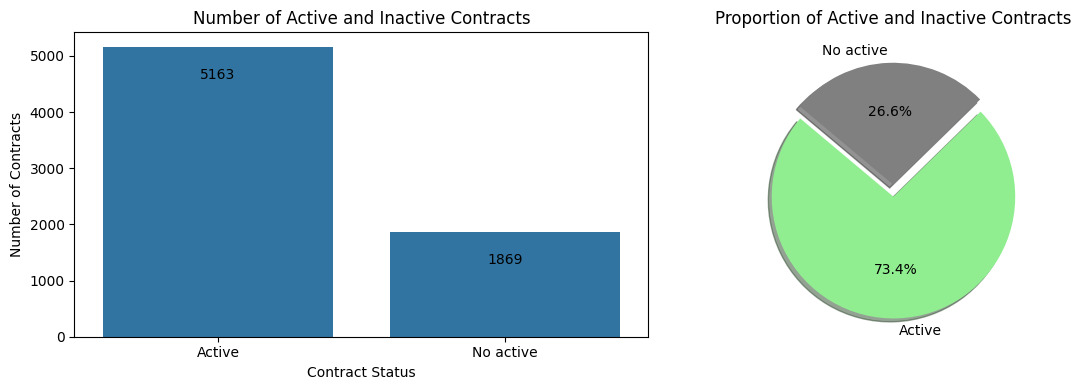

In [146]:
# Graph size
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: Count contracts
sns.barplot(x=['Active', 'No active'], y=[
            count_active_contracts, count_finished_contracts], ax=axs[0])

# Title
axs[0].set_title('Number of Active and Inactive Contracts')
axs[0].set_xlabel('Contract Status')
axs[0].set_ylabel('Number of Contracts')


# Count annotations
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -20), textcoords='offset points', fontsize=10)

# Subplot 2: Percentage contracts
labels = ['Active', 'No active']
sizes = [count_active_contracts, count_finished_contracts]
colors = ['lightgreen', 'gray']
explode = (0.1, 0)  

# Pie chart
axs[1].pie(sizes, explode=explode, labels=labels, colors=colors,
           autopct='%1.1f%%', shadow=True, startangle=140)

# Title
axs[1].set_title('Proportion of Active and Inactive Contracts')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ To visually compare the proportion of active and inactive contracts, the above shows a bar chart with the absolute representation and a pie chart for its relative proportion of the total contracts.<br>
▶ It is observed that most contracts are active, representing approximately 73% of the total. Understanding this distribution is important for developing customer retention strategies.
</div>


### Evolution of Contracts Over Time

<div style="color: #196CC4;">
▶ Dividing the data into active contracts and inactive (or terminated) contracts and counting each year allows us to understand how the number of contracts varies over time.
</div>


In [147]:
# Active contracts
active_contracts = df_merged[df_merged['enddate'].isnull()]

# Inactive contracts
finished_contracts = df_merged[df_merged['enddate'].notna()]

# Sorted years
years = sorted(df_merged['begindate'].dt.year.unique())

# Counters initialization
active_counts = []
finished_counts = []

# Loop
for year in years:
    # Active new contracts
    active_year = active_contracts[active_contracts['begindate'].dt.year == year].shape[0]

    # Finished contracts
    finished_year = finished_contracts[finished_contracts['enddate'].dt.year == year].shape[0]

    # Append
    active_counts.append(active_year)
    finished_counts.append(finished_year)

# Print
print(active_counts)
print(finished_counts)

[0, 1246, 729, 618, 646, 715, 976, 233]
[0, 0, 0, 0, 0, 0, 1409, 460]


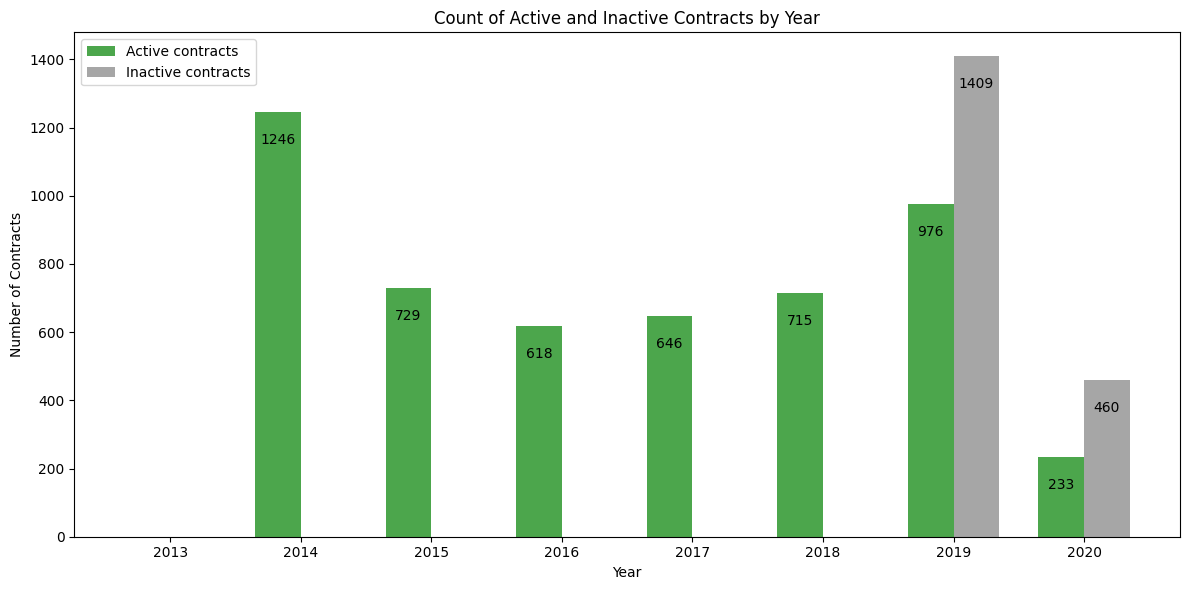

In [148]:

# Graph size and configuration
bar_width = 0.35
index = np.arange(len(years))
plt.figure(figsize=(12, 6))

# Active and finished contracts bars
bars1 = plt.bar(index - bar_width/2, active_counts, bar_width,
                label='Active contracts', color='green', alpha=0.7)
bars2 = plt.bar(index + bar_width/2, finished_counts, bar_width,
                label='Inactive contracts', color='gray', alpha=0.7)

# Title
plt.title('Count of Active and Inactive Contracts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Contracts')
plt.xticks(index, years)  # X axis labels
plt.legend()

# Count
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height != 0: #Count only if the value is different from 0
            plt.gca().annotate(format(height, '.0f'),
                               (bar.get_x() + bar.get_width() / 2., height),
                               ha='center', va='center', xytext=(0, -20),
                               textcoords='offset points', fontsize=10)

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ New Active Contracts start at 0 in the first year, increase significantly in the second year (1246), and then gradually decrease in the following years. There is a slight increase from the fifth year (646) to the seventh year (976), but it drops drastically in the eighth and final year of the data (244).<br>
▶ On the other hand, Inactive/Cancelled Contracts have no records during the first six years, indicating complete retention during that period. However, starting from the seventh year, there is a significant increase in inactive contracts or cancellations, with 1409 records in the seventh year and 460 in the eighth year.<br>
▶ Understanding these fluctuations helps identify potential changes in acquiring new customers or retaining existing ones over the years. The sudden increase in cancellations in the seventh year may be due to various factors such as customer dissatisfaction, market changes, or competition.
</div>


### Feature Engineering

<div style="color: #196CC4;">
<b><u>Active Contracts</u></b><br>

▶ Next, we use the presence of NaN values in the 'enddate' column to create an additional column 'contract_active' that represents whether the contract is active or not, facilitating further analysis and model building.<br>
▶ This new series can serve as the new target feature with two unique values for active and inactive contracts ('Yes' and 'No'), allowing us to keep the 'enddate' column as type date and retain all its date values.
</div>


In [149]:
# New Series
df_merged['contract_active'] = df_merged['enddate'].isnull()

# Print
display(df_merged.head())

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,contract_active
0,0002-ORFBO,2019-05-01,NaT,One year,Yes,Mailed check,65.6,593.30,Female,0,...,Yes,DSL,No,Yes,No,Yes,Yes,No,No,True
1,0003-MKNFE,2019-05-01,NaT,Month-to-month,No,Mailed check,59.9,542.40,Male,0,...,No,DSL,No,No,No,No,No,Yes,Yes,True
2,0004-TLHLJ,2019-09-01,2020-01-01,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,...,No,Fiber optic,No,No,Yes,No,No,No,No,False
3,0011-IGKFF,2018-12-01,2020-01-01,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,...,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,No,False
4,0013-EXCHZ,2019-09-01,2019-12-01,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,...,No,Fiber optic,No,No,No,Yes,Yes,No,No,False


<div style="color: #196CC4;">
<b><u>Contract Duration</u></b><br>

▶ A new series "duration_days" is created from the existing data to facilitate the analysis of contracts that have been completed.<br>
▶ Calculating and visualizing the duration of completed contracts in days provides useful information for analyzing the distribution and characteristics of these contracts over time.
</div>


In [150]:
# New DataFrame
contracts_dates = df_merged[['begindate', 'enddate']].copy()

# New Series
df_merged['duration_days'] = (contracts_dates['enddate'] - contracts_dates['begindate']).dt.days.astype('Int64')

# Print
display(df_merged[['begindate', 'enddate', 'duration_days']].head(5))

,begindate,enddate,duration_days
0,2019-05-01,NaT,<NA>
1,2019-05-01,NaT,<NA>
2,2019-09-01,2020-01-01,122
3,2018-12-01,2020-01-01,396
4,2019-09-01,2019-12-01,91


<div style="color: #196CC4;">
<b><u>Distribution of Contract Duration</u></b><br>

▶ Descriptive statistics provide valuable information about the duration of contracts.<br>
▶ The box plot offers a graphical visualization of the data distribution.
</div>


In [151]:
df_merged['duration_days'].describe()

count        1869.0
mean      547.35206
std      594.389607
min            30.0
25%            61.0
50%           304.0
75%           883.0
max          2191.0
Name: duration_days, dtype: Float64

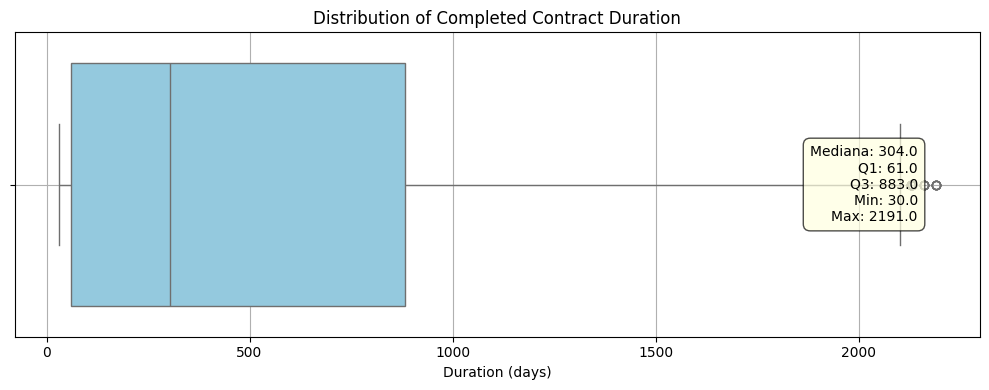

In [152]:
# Copy of finished contracts
finished_contracts = df_merged[df_merged['enddate'].notna()].copy()

# Duration days for finished contracts
finished_contracts['duration_days'] = (
    finished_contracts['enddate'] - finished_contracts['begindate']).dt.days

# Plot
plt.figure(figsize=(10, 4))

# Boxplot
sns.boxplot(x='duration_days', data=finished_contracts,
            color='skyblue')
plt.xlabel('Duration (days)')
plt.title('Distribution of Completed Contract Duration')
plt.grid(True)

# Key datapoints
desc_stats = finished_contracts['duration_days'].describe()
stats_str = f'Mediana: {desc_stats["50%"]}\nQ1: {desc_stats["25%"]}\nQ3: {
    desc_stats["75%"]}\nMin: {desc_stats["min"]}\nMax: {desc_stats["max"]}'

plt.annotate(stats_str,
             xy=(0.95, 0.5),
             xycoords='axes fraction',
             xytext=(-10, 0),
             textcoords='offset points',
             ha='right', va='center',
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', fc='lightyellow', alpha=0.7))

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ A total of 1,869 contracts have been completed.<br>
▶ The average duration of these contracts is approximately 547 days.<br>
▶ Most contracts have a duration concentrated between approximately 61 and 883 days, as indicated by the interquartile range (25%: 61 days | 50%: 304 days | 75%: 883 days).<br>
▶ The variability in contract duration has a standard deviation of approximately 549 days.<br>
▶ The shortest contract has a duration of 30 days, while the longest has a duration of 2,191 days, indicating a wide range of outliers towards the maximum duration.<br>
</div>


### Internet Service Features

<div style="color: #196CC4;">
▶ To analyze the results of the services and understand the behavior patterns between users who cancel their contracts and those who maintain active contracts, we will examine each one below.
</div>

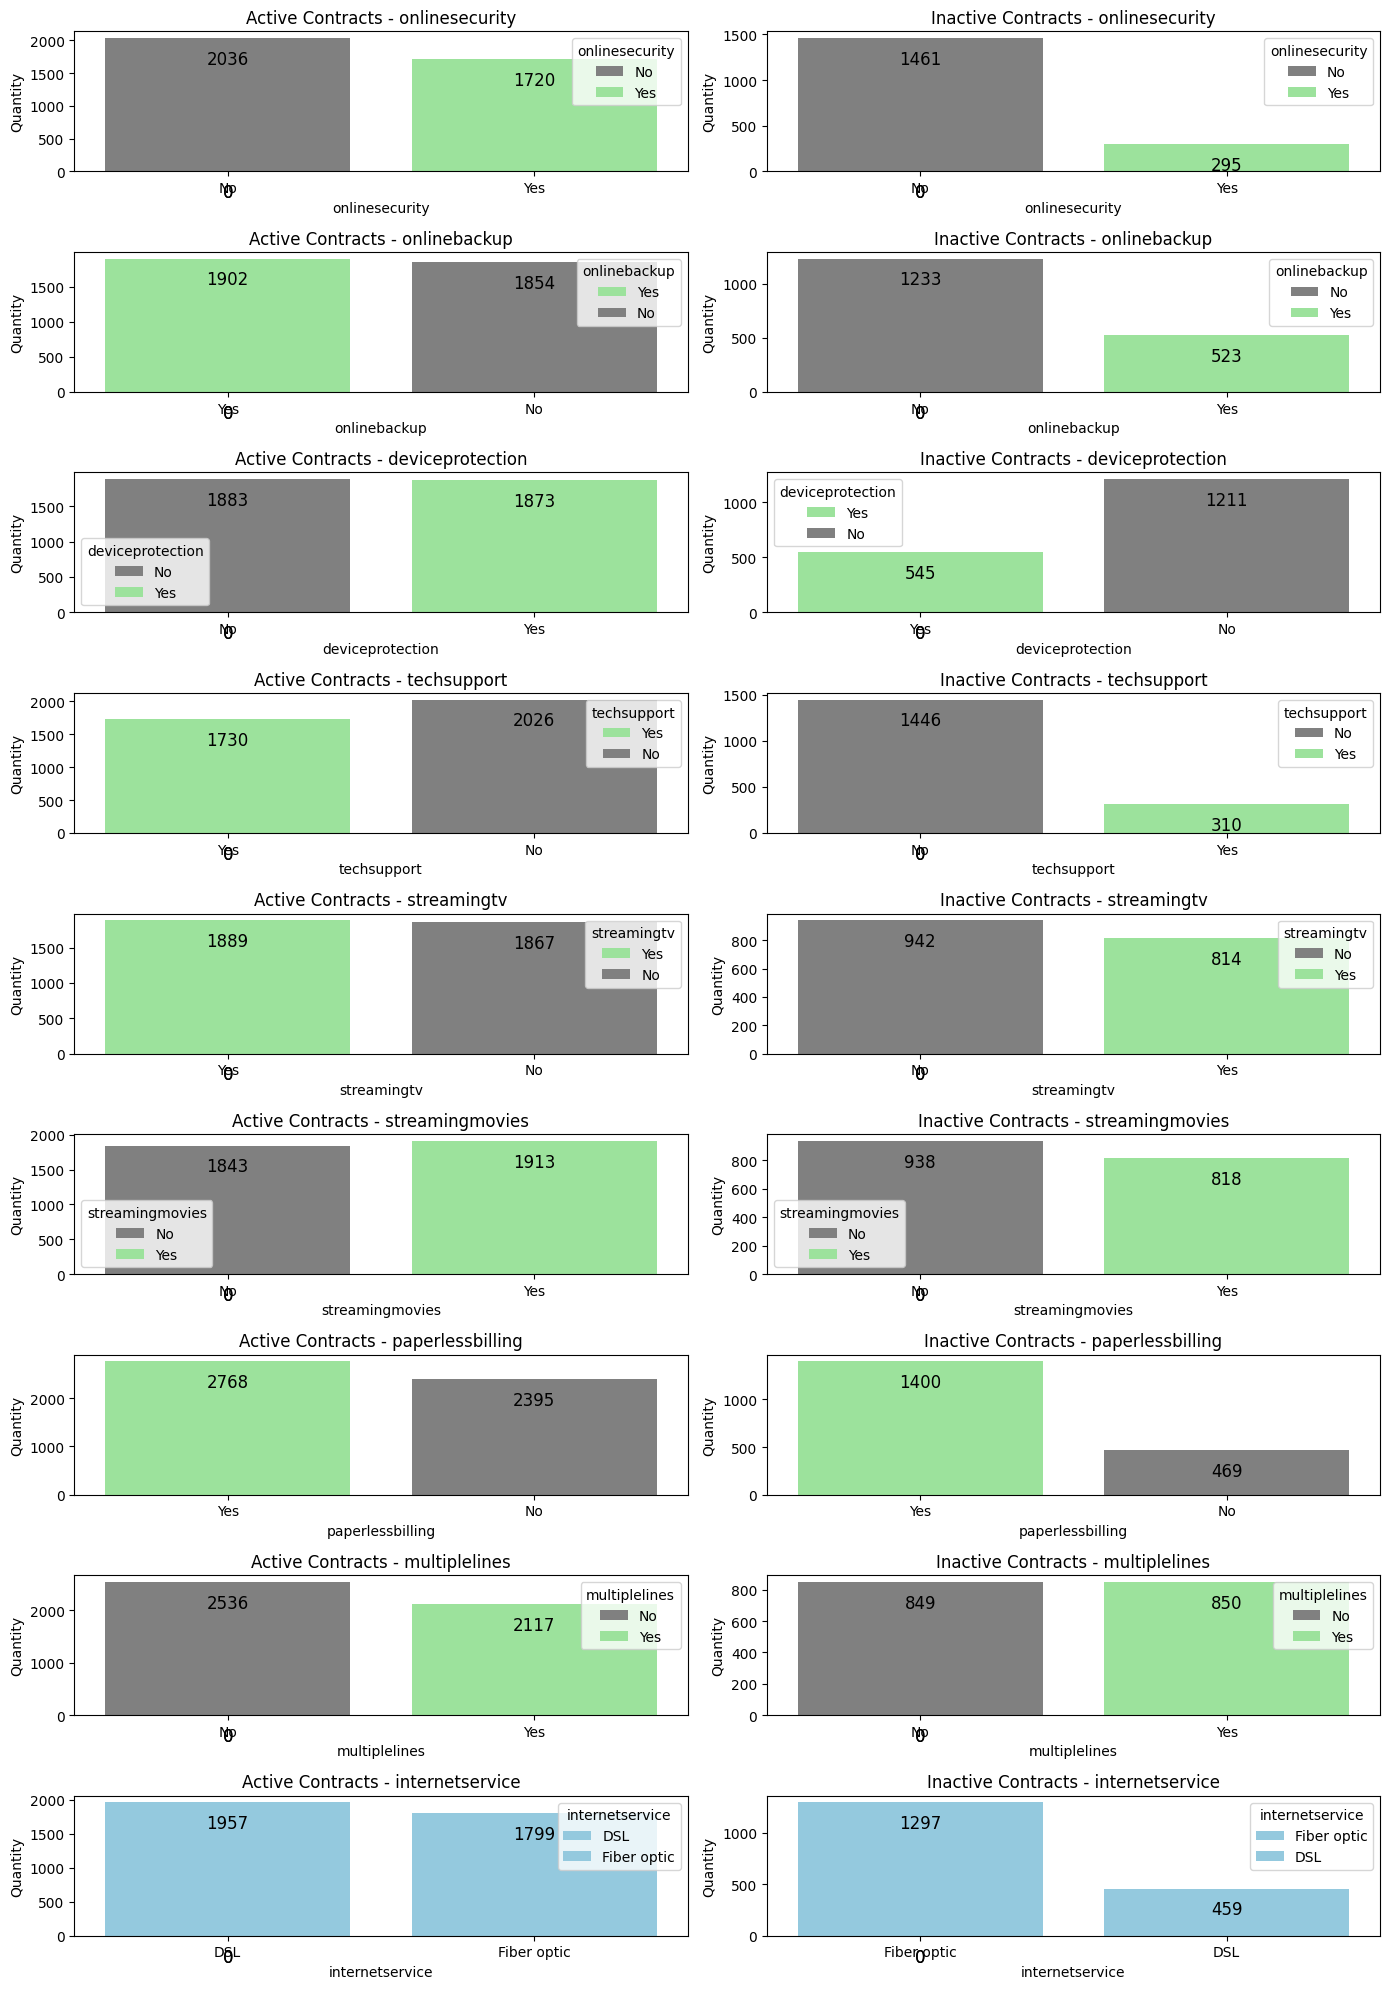

In [153]:
# Categories
categories = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
              'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'multiplelines', 'internetservice']

# Color palette
custom_palette = {'No': 'gray', 'Yes': 'lightgreen',
                  'Fiber optic': 'skyblue', 'DSL': 'skyblue'}

# Graph size
plt.figure(figsize=(14, 20))

# Loop
for i, category in enumerate(categories, 1):
    # Active contracts subplot
    plt.subplot(len(categories), 2, 2*i - 1)
    ax = sns.countplot(x=category, data=active_contracts,
                       hue=category, palette=custom_palette)
    
    # Title
    plt.title(f'Active Contracts - {category}')
    #plt.xlabel(category)
    plt.ylabel('Quantity')

    # Count
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -15),
                    textcoords='offset points', fontsize=12)

    # Inactive contracts subplot
    plt.subplot(len(categories), 2, 2*i)
    ax = sns.countplot(x=category, data=finished_contracts,
                       hue=category, palette=custom_palette)
    
    # Title
    plt.title(f'Inactive Contracts - {category}')
    #plt.xlabel(category)
    plt.ylabel('Quantity')

    # Count
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -15),
                    textcoords='offset points', fontsize=12)

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ <b>Online Security:</b> Both active and inactive contracts tend to have less online security, but this is much more pronounced in inactive contracts. Thus, the lack of online security may be a factor influencing contract cancellations.<br>
▶ <b>Online Backup:</b> Active contracts have more online backup than inactive contracts, so this service might be another retention factor.<br>
▶ <b>Device Protection:</b> Similar to the previous two services, active contracts have more device protection compared to inactive contracts.<br>
▶ <b>Tech Support:</b> Both active and inactive users tend to have less access to tech support, but the difference is much more pronounced in inactive contracts. This suggests that good tech support might be crucial for customer retention.<br>
▶ <b>Streaming TV and Streaming Movies:</b> Both streaming services show patterns where active contracts have higher access to these services compared to inactive contracts. Thus, entertainment services might positively influence customer retention.<br>
▶ <b>Paperless Billing:</b> Electronic billing appears to be more common among both active and inactive contracts, though the difference is much greater in inactive contracts.<br>
▶ <b>Multiple Lines:</b> The presence of multiple lines is less common in active contracts compared to inactive ones, where the proportion is nearly balanced.<br>
▶ <b>Internet Service:</b> Fiber Optic is less prevalent in active contracts compared to DSL. There is a considerable proportion of inactive contracts that used Fiber Optic compared to DSL, which might be related to contract cancellations.<br>
</div>

### Customer Characteristics

<div style="color: #196CC4;">
▶ To understand the behavior patterns of users who cancel their contracts and those who maintain active contracts, we will examine each of their characteristics below.
</div>

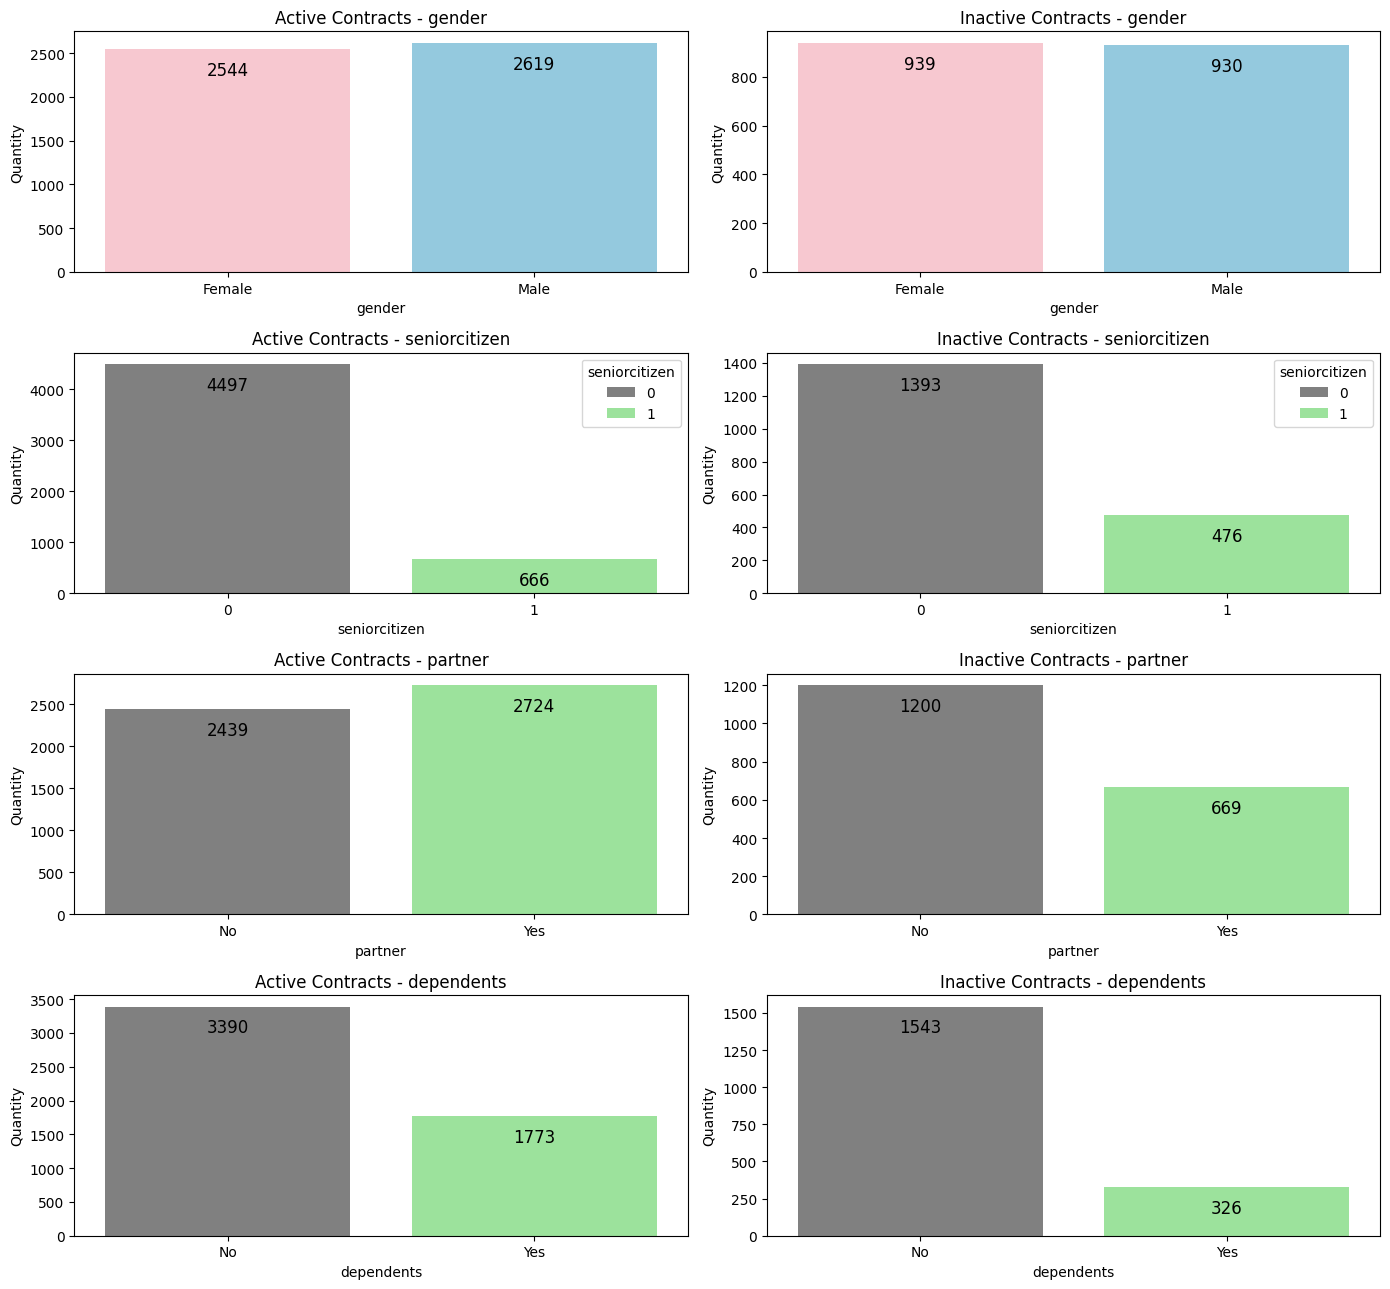

In [154]:
# Categories
categories = ['gender', 'seniorcitizen', 'partner', 'dependents']

# Color palette
custom_palette = {'No': 'gray', 'Yes': 'lightgreen', 0: 'gray',
                  1: 'lightgreen', 'Male': 'skyblue', 'Female': 'pink'}

# Graph size
plt.figure(figsize=(14, 13))

# Loop
for i, category in enumerate(categories, 1):
    # Active contracts subplot
    plt.subplot(len(categories), 2, 2*i - 1)
    ax = sns.countplot(x=category, data=active_contracts,
                       # Ensure the order is the same
                       order=sorted(active_contracts[category].unique()),
                       hue=category, palette=custom_palette)

    # Title
    plt.title(f'Active Contracts - {category}')
    plt.xlabel(category)
    plt.ylabel('Quantity')

    # Count annotations
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, -15),
                        textcoords='offset points', fontsize=12)

    # Inactive contracts subplot
    plt.subplot(len(categories), 2, 2*i)
    ax = sns.countplot(x=category, data=finished_contracts,
                       # Ensure the order is the same
                       order=sorted(finished_contracts[category].unique()),
                       hue=category, palette=custom_palette)

    # Title
    plt.title(f'Inactive Contracts - {category}')
    plt.xlabel(category)
    plt.ylabel('Quantity')

    # Count annotations
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, -15),
                        textcoords='offset points', fontsize=12)

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ <b>Gender:</b> There is no significant difference in terms of gender between active and inactive contracts.<br>
▶ <b>Senior Citizen:</b> Senior citizens have a lower proportion in both active and inactive contracts. However, despite still being a minority, the proportion of senior citizens seems to be slightly higher among active contracts.<br>
▶ <b>Partner:</b> Customers who have a partner tend to have a higher proportion of active contracts compared to those without a partner, which could positively impact the retention of active contracts.<br>
▶ <b>Dependents:</b> Although customers with dependents are a minority in both cases, these users have a higher proportion in active contracts compared to inactive contracts.<br>
</div>

### Types of Contracts and Charges

<div style="color: #196CC4;">
    
▶ According to the data on contract types and monthly charges for active and inactive contracts, we can identify some patterns and characteristics as follows
    
</div>

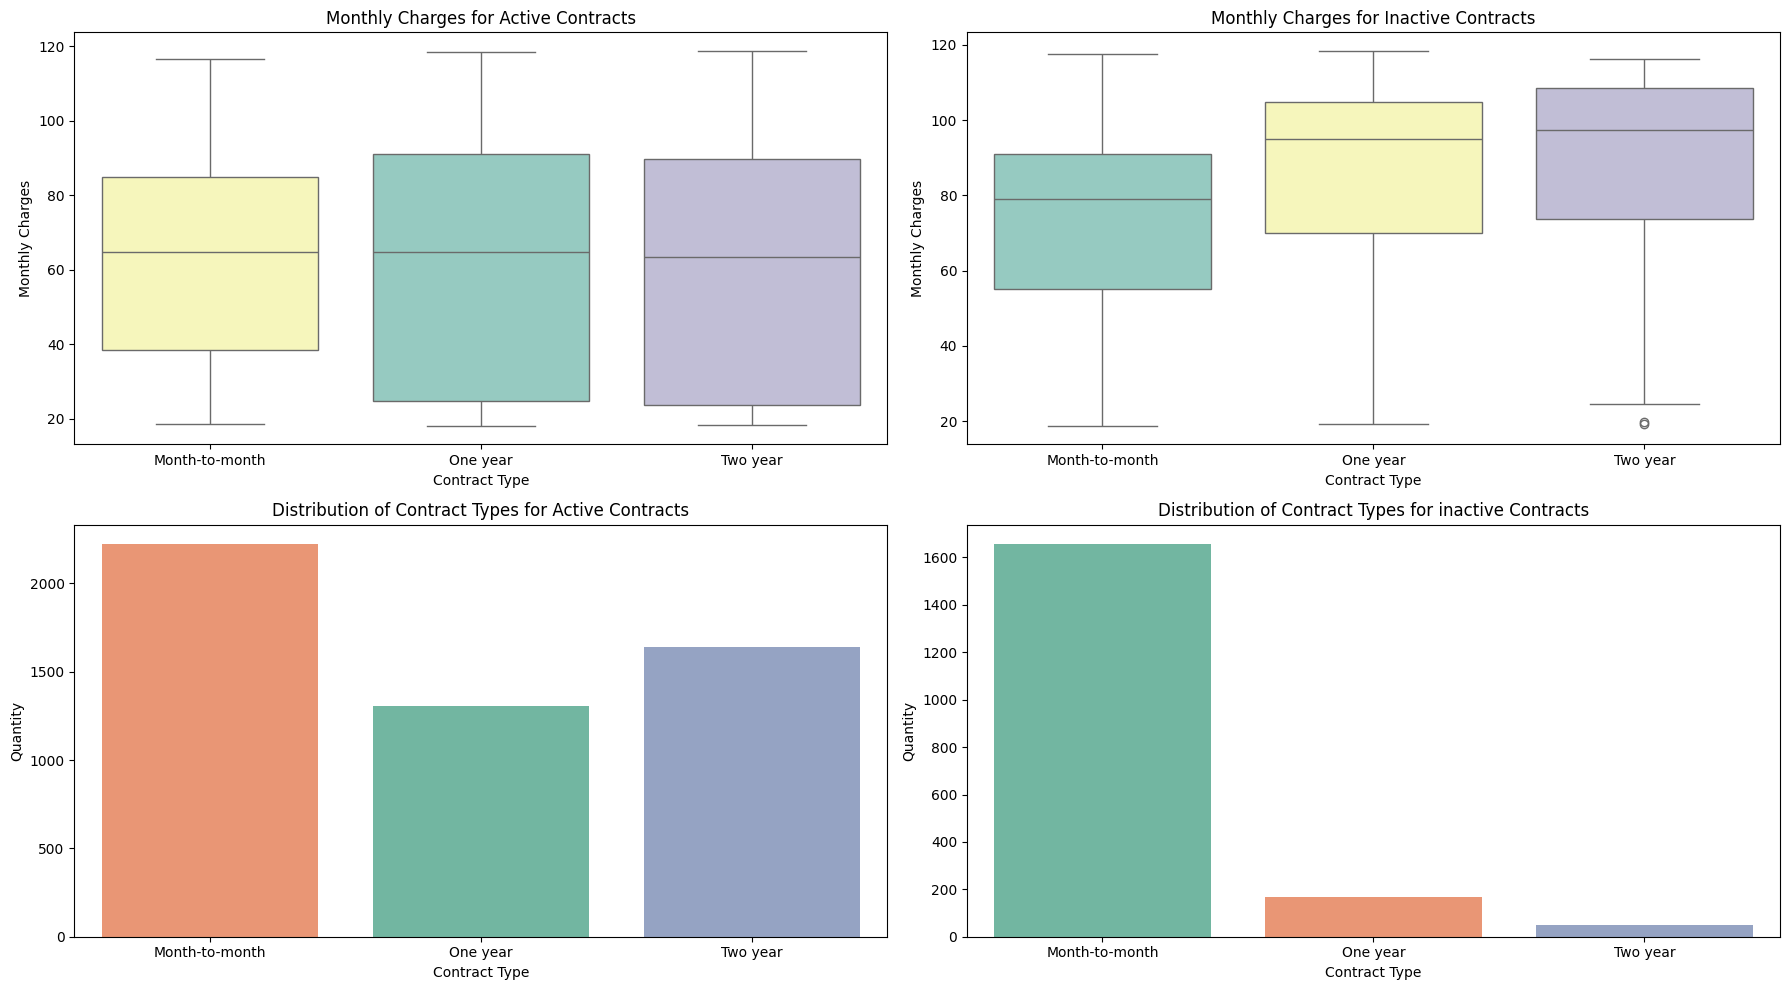

In [155]:
# Contract type
order = ['Month-to-month', 'One year', 'Two year']

# Graph size
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Subplot 1: Monthly charges & Active contracts
sns.boxplot(x='type', y='monthlycharges', data=active_contracts,
            palette='Set3', hue='type', ax=axs[0, 0], order=order)
axs[0, 0].set_title('Monthly Charges for Active Contracts')
axs[0, 0].set_xlabel('Contract Type')
axs[0, 0].set_ylabel('Monthly Charges')

# Subplot 2: Monthly charges & Inactive contracts
sns.boxplot(x='type', y='monthlycharges', data=finished_contracts,
            palette='Set3', hue='type', ax=axs[0, 1], order=order)
axs[0, 1].set_title('Monthly Charges for Inactive Contracts')
axs[0, 1].set_xlabel('Contract Type')
axs[0, 1].set_ylabel('Monthly Charges')

# Subplot 3: Contract type & Active contracts
sns.countplot(x='type', data=active_contracts,
              palette='Set2', hue='type', ax=axs[1, 0], order=order)
axs[1, 0].set_title('Distribution of Contract Types for Active Contracts')
axs[1, 0].set_xlabel('Contract Type')
axs[1, 0].set_ylabel('Quantity')

# Subplot 4: Contract type & Inactive contracts
sns.countplot(x='type', data=finished_contracts,
              palette='Set2', hue='type', ax=axs[1, 1], order=order)
axs[1, 1].set_title('Distribution of Contract Types for inactive Contracts')
axs[1, 1].set_xlabel('Contract Type')
axs[1, 1].set_ylabel('Quantity')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
<b>Monthly Charges by Contract Type</b><br>
▶ <b>"Month-to-Month":</b> these contracts tend to have lower monthly charges for inactive contracts.<br>
▶ <b>"Two Year":</b> especially for inactive contracts, show a higher median of monthly charges, while the interquartile range is greater for active contracts. It is observed that customers who opt to cancel their contract have higher rates, while users with contracts that remain prefer more accessible monthly rates and are less likely to cancel.<br>

<b>Contract Type Distribution</b><br>
▶ <b>Active Contracts:</b> "Month-to-month" is the most common type of contract among active contracts; this suggests that most customers prefer monthly contracts and thus flexibility, rather than long-term commitments.<br>
▶ <b>Inactive Contracts:</b> "Month-to-month" is also the most common type of contract among inactive contracts. The proportion of customers canceling with a "One year" or "Two year" contract scheme is considerably lower compared to the proportion of these same schemes in active contracts.<br>
▶ <b>Summary:</b> most customers seek "Month-to-month" contracts, which represents flexibility and consequently a high churn or cancellation rate. In contrast, customers with "One year" or "Two year" contracts generally seek long-term affiliation as they have a minimal cancellation rate.<br>
</div>


### Payment Methods

<div style="color: #196CC4;">
▶ Based on the distribution of payment methods for active and inactive contracts, we can observe the following:
</div>


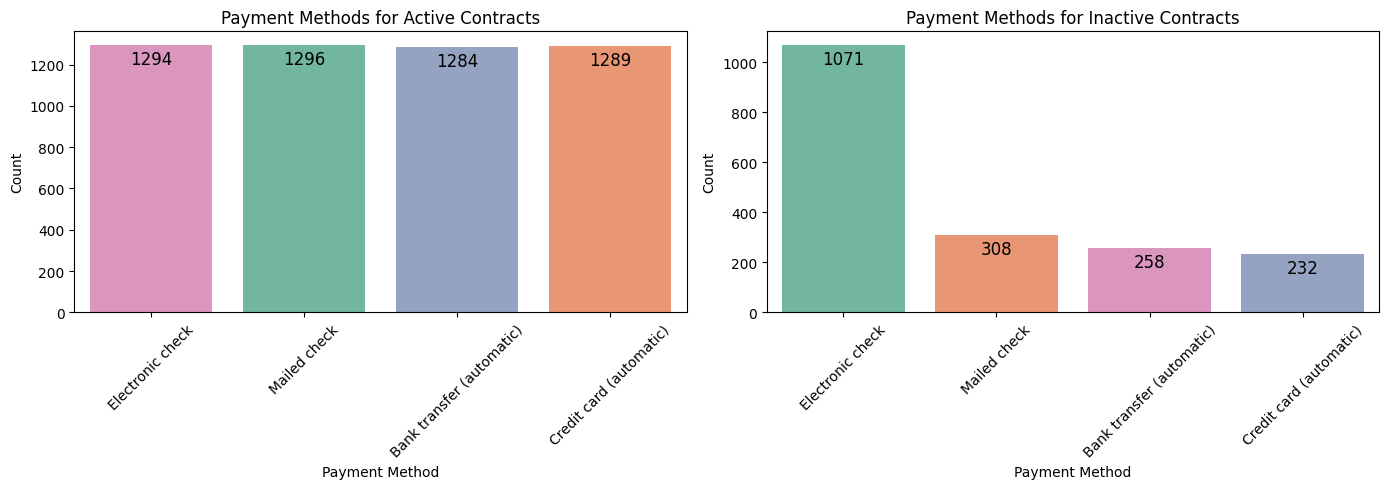

In [156]:

# Definir el orden de los métodos de pago
payment_order = df_merged['paymentmethod'].value_counts().index

# Tamaño del gráfico y configuración del grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Subplot 1: Métodos de pago para contratos activos
sns.countplot(x='paymentmethod', data=active_contracts,
              palette='Set2', hue='paymentmethod', ax=axs[0], order=payment_order)
axs[0].set_title('Payment Methods for Active Contracts')
axs[0].set_xlabel('Payment Method')
axs[0].set_ylabel('Count')

# Girar etiquetas del eje x
axs[0].tick_params(axis='x', rotation=45)

# Anotaciones en el countplot de contratos activos
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -10),
                    textcoords='offset points', fontsize=12)

# Subplot 2: Métodos de pago para contratos no activos
sns.countplot(x='paymentmethod', data=finished_contracts,
              palette='Set2', hue='paymentmethod', ax=axs[1], order=payment_order)
axs[1].set_title('Payment Methods for Inactive Contracts')
axs[1].set_xlabel('Payment Method')
axs[1].set_ylabel('Count')


# Girar etiquetas del eje x
axs[1].tick_params(axis='x', rotation=45)

# Anotaciones en el countplot de contratos no activos
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -10),
                    textcoords='offset points', fontsize=12)

# Ajuste de diseño y mostrar
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ <b>Balance of Active Contracts:</b> They have a fairly uniform distribution across the four payment methods, with around 1290 to 1304 contracts each.<br>
▶ <b>Disbalance of Inactive Contracts:</b> Show a strong preference for electronic check payment (1071 contracts), suggesting that customers using this payment method have a higher tendency to cancel their contracts.
</div>


-----

## Data Preparation

### Removal of Irrelevant Data


<div style="color: #196CC4;">
<b>Based on all the previous analysis, it can be observed that the following Series are not significantly relevant and therefore can be omitted to simplify processing:</b><br>

▶ <b>gender:</b> there is no significant difference in terms of gender between active and inactive contracts.<br>
▶ <b>begindate:</b> dates, by themselves, are not useful as direct inputs for most machine learning models. It is important to simplify the dataset to the most significant features.<br>
▶ <b>enddate:</b> similar to "begindate", this data will no longer be useful. The new target feature "contract_active" (boolean) will help simplify the results of this investigation.<br>
▶ <b>duration_days:</b> extracted from "begindate" and "enddate" was useful in the exploratory data analysis, but no specific temporal patterns were identified that could influence the results of this investigation.<br>
▶ <b>customerid:</b> initially useful for merging all datasets, but generally not used as a feature in predictive models directly, so it is better to remove it.
</div>

In [157]:
# Delete Series
df_merged.drop(columns=['gender'], inplace=True)
df_merged.drop(columns=['begindate'], inplace=True)
df_merged.drop(columns=['enddate'], inplace=True)
df_merged.drop(columns=['customerid'], inplace=True)
df_merged.drop(columns=['duration_days'], inplace=True)

In [158]:
# DataFrame properties
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              7032 non-null   object 
 1   paperlessbilling  7032 non-null   object 
 2   paymentmethod     7032 non-null   object 
 3   monthlycharges    7032 non-null   float64
 4   totalcharges      7032 non-null   float64
 5   seniorcitizen     7032 non-null   int64  
 6   partner           7032 non-null   object 
 7   dependents        7032 non-null   object 
 8   internetservice   5512 non-null   object 
 9   onlinesecurity    5512 non-null   object 
 10  onlinebackup      5512 non-null   object 
 11  deviceprotection  5512 non-null   object 
 12  techsupport       5512 non-null   object 
 13  streamingtv       5512 non-null   object 
 14  streamingmovies   5512 non-null   object 
 15  multiplelines     6352 non-null   object 
 16  contract_active   7032 non-null   bool   
dtype

In [159]:
# Descriptive statistics
df_merged.describe()

,monthlycharges,totalcharges,seniorcitizen
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,0.162400
std,30.085974,2266.771362,0.368844
min,18.250000,18.800000,0.000000
25%,35.587500,401.450000,0.000000
50%,70.350000,1397.475000,0.000000
75%,89.862500,3794.737500,0.000000
max,118.750000,8684.800000,1.000000


### Data Scaling

<div style="color: #196CC4;">
<b>Data Scaling</b><br>
▶ The technique of scaling data is commonly used in data preprocessing to bring all features to the same scale.<br>
▶ Next, the features 'monthlycharges' and 'totalcharges' in the dataset are scaled to normalize the features.
</div>

In [160]:
# Inicializer
escalador = MinMaxScaler()

# Transformation
df_merged[['monthlycharges', 'totalcharges']] = escalador.fit_transform(
    df_merged[['monthlycharges', 'totalcharges']])

In [161]:
# Print Series
display(df_merged[['monthlycharges', 'totalcharges']])

# Descriptive statistics
df_merged.describe()

,monthlycharges,totalcharges
0,0.471144,0.066294
1,0.414428,0.060420
2,0.553731,0.030239
3,0.793532,0.140670
4,0.653234,0.028687
...,...,...
7038,0.367164,0.083556
7039,0.665174,0.214043
7040,0.318905,0.008533
7041,0.493532,0.531831


,monthlycharges,totalcharges,seniorcitizen
count,7032.000000,7032.000000,7032.000000
mean,0.463166,0.261309,0.162400
std,0.299363,0.261571,0.368844
min,0.000000,0.000000,0.000000
25%,0.172512,0.044155,0.000000
50%,0.518408,0.159090,0.000000
75%,0.712562,0.435719,0.000000
max,1.000000,1.000000,1.000000


### Variable Encoding

<div style="color: #196CC4;">
<b>OHE: One-Hot Encoding</b><br>
▶ It is essential for data preprocessing in machine learning, facilitating the representation and handling of categorical variables in predictive and analytical models.
</div>

In [162]:
# Columns
columns_to_encode = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                     'techsupport', 'streamingtv', 'streamingmovies',
                     'seniorcitizen', 'partner', 'dependents', 'paperlessbilling', 'multiplelines']

# Encode 'type' and 'paymentmethod' without dropping any columns
df_encoded = pd.get_dummies(df_merged, columns=['type', 'paymentmethod'])

# Encode for those with two unique values
df_encoded = pd.get_dummies(
    df_encoded, columns=columns_to_encode, drop_first=True)

In [163]:
# DataFrame properties
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   monthlycharges                           7032 non-null   float64
 1   totalcharges                             7032 non-null   float64
 2   contract_active                          7032 non-null   bool   
 3   type_Month-to-month                      7032 non-null   bool   
 4   type_One year                            7032 non-null   bool   
 5   type_Two year                            7032 non-null   bool   
 6   paymentmethod_Bank transfer (automatic)  7032 non-null   bool   
 7   paymentmethod_Credit card (automatic)    7032 non-null   bool   
 8   paymentmethod_Electronic check           7032 non-null   bool   
 9   paymentmethod_Mailed check               7032 non-null   bool   
 10  internetservice_Fiber optic              7032 non-nul

In [164]:
# Display DataFrame
df_encoded.head(5)

,monthlycharges,totalcharges,contract_active,type_Month-to-month,type_One year,type_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,...,onlinebackup_Yes,deviceprotection_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,seniorcitizen_1,partner_Yes,dependents_Yes,paperlessbilling_Yes,multiplelines_Yes
0,0.471144,0.066294,True,False,True,False,False,False,False,True,...,True,False,True,True,False,False,True,True,True,False
1,0.414428,0.060420,True,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,0.553731,0.030239,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0.793532,0.140670,False,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,False,True,False
4,0.653234,0.028687,False,True,False,False,False,False,False,True,...,False,False,True,True,False,True,True,False,True,False


### Data Splitting

<div style="color: #196CC4;">
<b>The data is divided as follows to achieve a 6:2:2 ratio:</b><br>
▶ 60% Training dataset<br>
▶ 20% Validation dataset<br>
▶ 20% Test dataset<br><br>

The larger the training set, the more data the model will have to learn patterns and relationships. The validation dataset will be used to evaluate the model's performance, and the test dataset will be reserved until the end to assess the final performance of the model (once the training and validation processes are complete).
</div>

In [165]:
# Data split
df_train, remaining_data = train_test_split(df_encoded, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(remaining_data, test_size=0.5, random_state=12345)

In [166]:
# Features and Target variables
features_train = df_train.drop(['contract_active'], axis=1)
target_train = df_train['contract_active']

features_valid = df_valid.drop(['contract_active'], axis=1)
target_valid = df_valid['contract_active']

# FINAL TESTING SETS ↓

# Train + Valid
total_features_train = pd.concat([features_train, features_valid])
total_target_train = pd.concat([target_train, target_valid])

features_test = df_test.drop(['contract_active'], axis=1)
target_test = df_test['contract_active']

### Class Balance

<div style="color: #196CC4;">
▶ The class imbalance analysis focuses on the labels of the target variable 'contract_active' (boolean) to understand the proportion of each class ('True' or 'False'). This analysis helps determine if there is a significant imbalance in the classes, which is crucial for deciding whether we need to apply balancing techniques such as undersampling or oversampling.
</div>

Class distribution in the training set:
contract_active
True     0.736193
False    0.263807
Name: proportion, dtype: float64


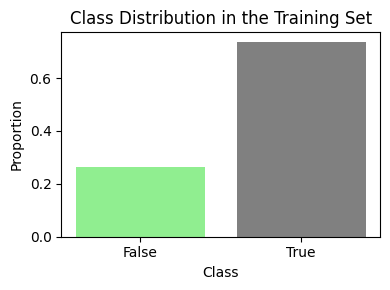

In [167]:
# Calculate proportion
class_counts_train = target_train.value_counts(normalize=True)
print("Class distribution in the training set:")
print(class_counts_train)

# Graph size
plt.figure(figsize=(4, 3))

# Train data
plt.bar(class_counts_train.index, class_counts_train.values, color=['gray', 'lightgreen'])

# Title
plt.title('Class Distribution in the Training Set')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['False', 'True'])

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ **Oversampling** and **undersampling** are two common techniques to address class imbalance in a dataset.<br>
▶ The procedure for both methods is shown below, as each has its benefits and areas of opportunity. The resulting samples will be key to validating which method better supports model performance for this specific project.<br>
▶ This is performed only on the training set and does not need to be applied to the validation and test sets, as these sets are primarily used to evaluate the model's performance after it has been trained.
</div>


#### Oversampling

<div style="color: #196CC4;">
▶ It involves increasing the number of examples in the minority class to match the number of examples in the majority class.<br>
▶ This method does not result in data loss; it can be useful when there is sufficient processing time and when the minority class contains valuable information that could be lost with undersampling.<br>
▶ On the other hand, it may lead to longer training times and increase the risk of overfitting.
</div>


In [168]:
# Function
def upsample(features, target):
    features_zeros = features[target == False]
    features_ones = features[target == True]
    target_zeros = target[target == False]
    target_ones = target[target == True]

    # Number of repetitions
    repeat_times = len(target_zeros) // len(target_ones)

    # Additional samples
    additional_samples = len(target_zeros) % len(target_ones)

    # Upsample the minority class
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat_times + [
                                   features_ones.sample(additional_samples, replace=True)])
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat_times + [
                                 target_ones.sample(additional_samples, replace=True)])

    # Shuffle data
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    # Return
    return features_upsampled, target_upsampled

# Apply upsampling
features_upsampled, target_upsampled = upsample(features_train, target_train)

Class distribution after oversampling:
contract_active
False    0.5
True     0.5
Name: proportion, dtype: float64


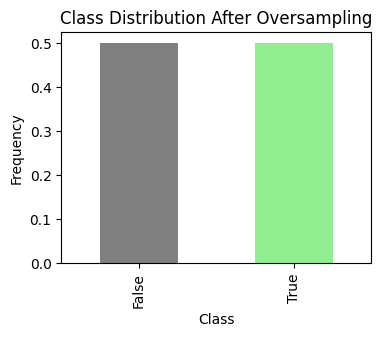

In [169]:
# Calculate distribution
class_frequency_upsampled = target_upsampled.value_counts(normalize=True)

# Print
print("Class distribution after oversampling:")
print(class_frequency_upsampled)

# Graph size
plt.figure(figsize=(4, 3))

# Plot
class_frequency_upsampled.plot(kind='bar', color=['gray', 'lightgreen'])

# Title
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'])

# Print
plt.show()

#### Undersampling

<div style="color: #196CC4;">
▶ It involves reducing the number of examples in the majority class to match the number of examples in the minority class.<br>
▶ By reducing the dataset size, it can speed up model training and improve performance by avoiding overfitting to the majority class.<br>
▶ On the other hand, valuable information may be lost by removing examples from the majority class, potentially resulting in a less accurate model.
</div>


In [170]:
# Function
def downsample(features, target):

    # Separate characteristics
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

   
    # Submuestrear la clase mayoritaria (1)
    features_majority_downsampled = features_ones.sample(
        len(target_zeros), random_state=12345, replace=False)
    target_majority_downsampled = target_ones.sample(
        len(target_zeros), random_state=12345, replace=False)
    features_minority = features_zeros
    target_minority = target_zeros

    # Downsample the mayority class
    features_downsampled = pd.concat(
        [features_majority_downsampled, features_minority])
    target_downsampled = pd.concat(
        [target_majority_downsampled, target_minority])

    # Shuffle data
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    # Return
    return features_downsampled, target_downsampled


# Apply downsampling
features_downsampled, target_downsampled = downsample(
    features_train, target_train)

Class distribution after undersampling:
contract_active
True     0.5
False    0.5
Name: proportion, dtype: float64


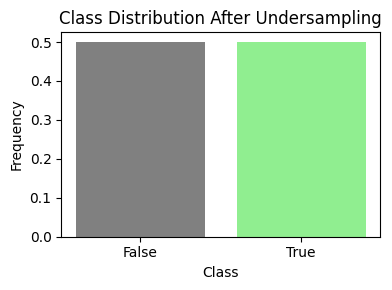

In [171]:
# Calculate distribution
class_frequency_downsampled = target_downsampled.value_counts(normalize=True)

# Print
print("Class distribution after undersampling:")
print(class_frequency_downsampled)

# Graph size
plt.figure(figsize=(4, 3))

# Plot
plt.bar(class_frequency_downsampled.index.astype(str),
        class_frequency_downsampled.values, color=['gray', 'lightgreen'])

# Title
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'])

# Print
plt.tight_layout()
plt.show()

-----

## Model Development

### Introduction


<div style="color: #196CC4;">
<b><u>Models</u></b><br>
The data is ready to start implementing the models for this classification project: <br>
▶ Logistic Regression<br>
▶ KNN Classifier<br>
▶ Random Forest <b>*</b><br>
▶ Gradient Boosting Machine (GBM) <b>*</b><br>
▶ XGBoost (Extreme Gradient Boosting) <b>*</b><br>
▶ LightGBM (Light Gradient Boosting Machine) <b>*</b><br>
<b>*</b> Includes variation with cross-validation to check for performance improvement.<br><br>
<b>Note:</b> It will also be evaluated whether the models perform better with the undersampling or oversampling datasets previously applied.<br><br>

<b><u>Metrics</u></b><br>
For this classification project, the models will be evaluated using the following metrics:<br>
▶ <b>Accuracy:</b> calculates the proportion of correct predictions out of the total predictions made.<br>
▶ <b>Precision:</b> important to avoid unnecessary retention actions for clients who would not cancel.<br>
▶ <b>Recall:</b> crucial for identifying as many at-risk clients as possible.<br>
▶ <b>F1-Score:</b> provides a balance between precision and recall, which is essential for an effective model.<br>
▶ <b>Confusion Matrix:</b> offers a detailed view of model performance, allowing for identification of areas for improvement.<br>
▶ <b>AUC-ROC:</b> provides an overall evaluation of model performance, regardless of the classification threshold.<br>
</div>

### Model 1: Logistic Regression

<div style="color: #196CC4;"> ▶ It is a simple statistical model that estimates the probability of a binary event occurring. In this project, it can be useful for quickly identifying the most influential characteristics in contract cancellations. </div>

In [172]:
# Model
model1 = LogisticRegression(random_state=12345, max_iter=1000)

# Fit
#model1.fit(features_upsampled, target_upsampled)
model1.fit(features_downsampled, target_downsampled)

# Predictions
m1_predictions_valid = model1.predict(features_valid)
m1_predictions_proba_valid = model1.predict_proba(features_valid)[:, 1]

# Print
#print(m1_predictions_valid)
#print(m1_predictions_proba_valid)

In [174]:
# Metrics
m1_auc_roc = roc_auc_score(target_valid, m1_predictions_proba_valid)
m1_accuracy = accuracy_score(target_valid, m1_predictions_valid)
m1_precision = precision_score(target_valid, m1_predictions_valid)
m1_recall = recall_score(target_valid, m1_predictions_valid)
m1_f1 = f1_score(target_valid, m1_predictions_valid)
m1_conf_matrix = confusion_matrix(target_valid, m1_predictions_valid)

# Print metrics
print("\n*****\nModel 1: Logistic Regression")
print(f"AUC-ROC: {m1_auc_roc:.2f}")
print(f"Accuracy: {m1_accuracy:.2f}")
print(f"Precision: {m1_precision:.2f}")
print(f"Recall: {m1_recall:.2f}")
print(f"F1 Score: {m1_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(m1_conf_matrix)


*****
Model 1: Logistic Regression
AUC-ROC: 0.83
Accuracy: 0.74
Precision: 0.90
Recall: 0.72
F1 Score: 0.80
Confusion Matrix:
[[285  82]
 [289 750]]


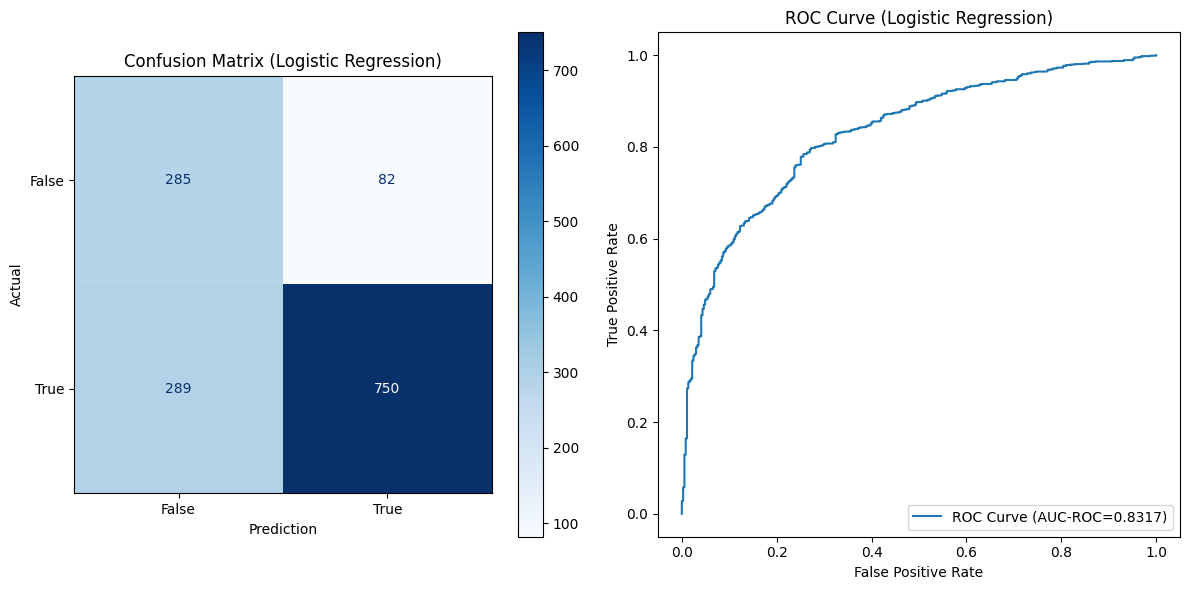

In [177]:
# General plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# Confusion Matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=m1_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (Logistic Regression)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_valid, m1_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % m1_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (Logistic Regression)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;"> ▶ The <b>"downsampled"</b> dataset is the best for this logistic regression model in this project, with a better combination of key metrics such as accuracy, recall, F1 score, and a confusion matrix with fewer false negatives. </div>

### Model 2: KNN Classifier

<div style="color: #196CC4;">
▶ This model classifies a customer based on the characteristics of their nearest neighbors in a similarity measure. It is an easy-to-implement model and can be useful for finding patterns among customers with similar characteristics.
</div>

In [179]:
# Model
model2 = KNeighborsClassifier()

# Train
#model2.fit(features_upsampled, target_upsampled)
model2.fit(features_downsampled, target_downsampled)

# Predictions
m2_predictions_valid = model2.predict(features_valid)
m2_predictions_proba_valid = model2.predict_proba(features_valid)[:, 1]

c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [180]:
# Metrics
m2_auc_roc = roc_auc_score(target_valid, m2_predictions_proba_valid)
m2_accuracy = accuracy_score(target_valid, m2_predictions_valid)
m2_precision = precision_score(target_valid, m2_predictions_valid)
m2_recall = recall_score(target_valid, m2_predictions_valid)
m2_f1 = f1_score(target_valid, m2_predictions_valid)
m2_conf_matrix = confusion_matrix(target_valid, m2_predictions_valid)

# Print
print("\n*****\nModel 2: K-Nearest Neighbors (KNN) Classifier")
print(f"AUC-ROC: {m2_auc_roc:.2f}")
print(f"Accuracy: {m2_accuracy:.2f}")
print(f"Precision: {m2_precision:.2f}")
print(f"Recall: {m2_recall:.2f}")
print(f"F1 Score: {m2_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(m2_conf_matrix)


*****
Model 2: K-Nearest Neighbors (KNN) Classifier
AUC-ROC: 0.79
Accuracy: 0.71
Precision: 0.91
Recall: 0.67
F1 Score: 0.77
Confusion Matrix:
[[295  72]
 [341 698]]


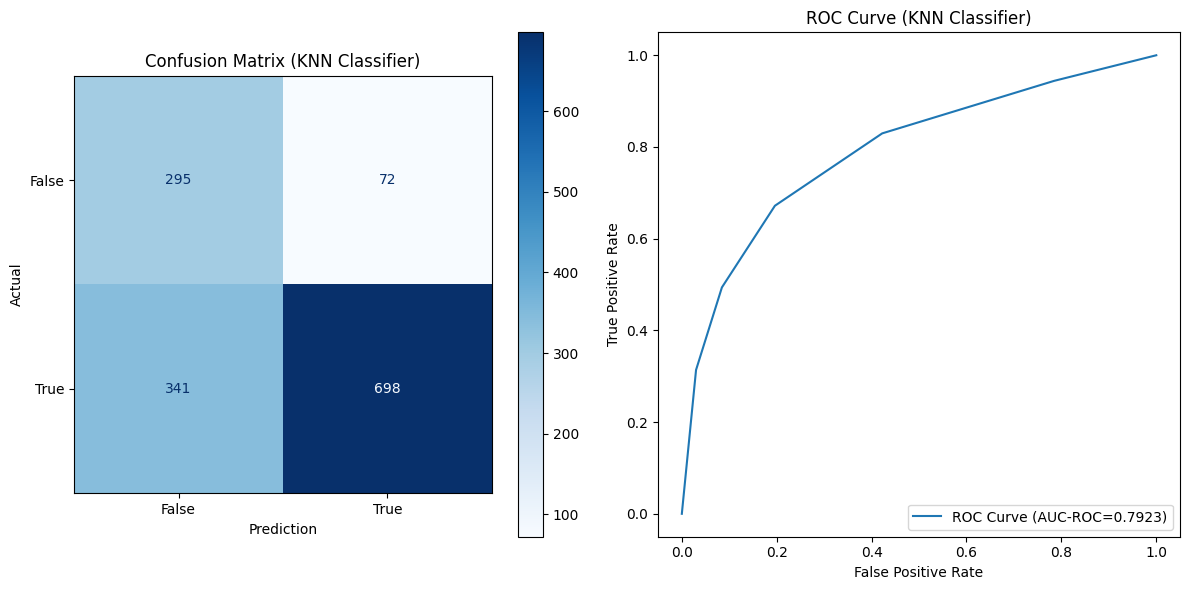

In [181]:
# Plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=m2_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (KNN Classifier)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_valid, m2_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % m2_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (KNN Classifier)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;"> ▶ The <b>"downsampled"</b> dataset is the best for this K-Nearest Neighbors (KNN) model, as it provides slightly higher AUC-ROC and F1 Score, indicating better discrimination between classes and a better balance between precision and recall compared to the upsampled dataset. </div>

### Model 3: Random Forest

<div style="color: #196CC4;"> ▶ Builds multiple decision trees and combines their results to make a final prediction. It is robust and its ability to handle a large number of variables and uncover interactions among them makes it valuable for identifying complex patterns in customer cancellations. </div>

In [182]:
# Model
model3 = RandomForestClassifier(
    random_state=12345, n_estimators=100, max_depth=10, min_samples_split=10)

# Fit
#model3.fit(features_upsampled, target_upsampled)
model3.fit(features_downsampled, target_downsampled)

# Predictions
m3_predictions_valid = model3.predict(features_valid)
m3_predictions_proba_valid = model3.predict_proba(features_valid)[:, 1]

In [183]:
# Metrics
m3_auc_roc = roc_auc_score(target_valid, m3_predictions_proba_valid)
m3_accuracy = accuracy_score(target_valid, m3_predictions_valid)
m3_precision = precision_score(target_valid, m3_predictions_valid)
m3_recall = recall_score(target_valid, m3_predictions_valid)
m3_f1 = f1_score(target_valid, m3_predictions_valid)
m3_conf_matrix = confusion_matrix(target_valid, m3_predictions_valid)

# Print metrics
print("\n*****\nModel 3: Random Forest")
print(f"AUC-ROC: {m3_auc_roc:.2f}")
print(f"Accuracy: {m3_accuracy:.2f}")
print(f"Precision: {m3_precision:.2f}")
print(f"Recall: {m3_recall:.2f}")
print(f"F1 Score: {m3_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(m3_conf_matrix)


*****
Model 3: Random Forest
AUC-ROC: 0.84
Accuracy: 0.74
Precision: 0.91
Recall: 0.72
F1 Score: 0.80
Confusion Matrix:
[[296  71]
 [293 746]]


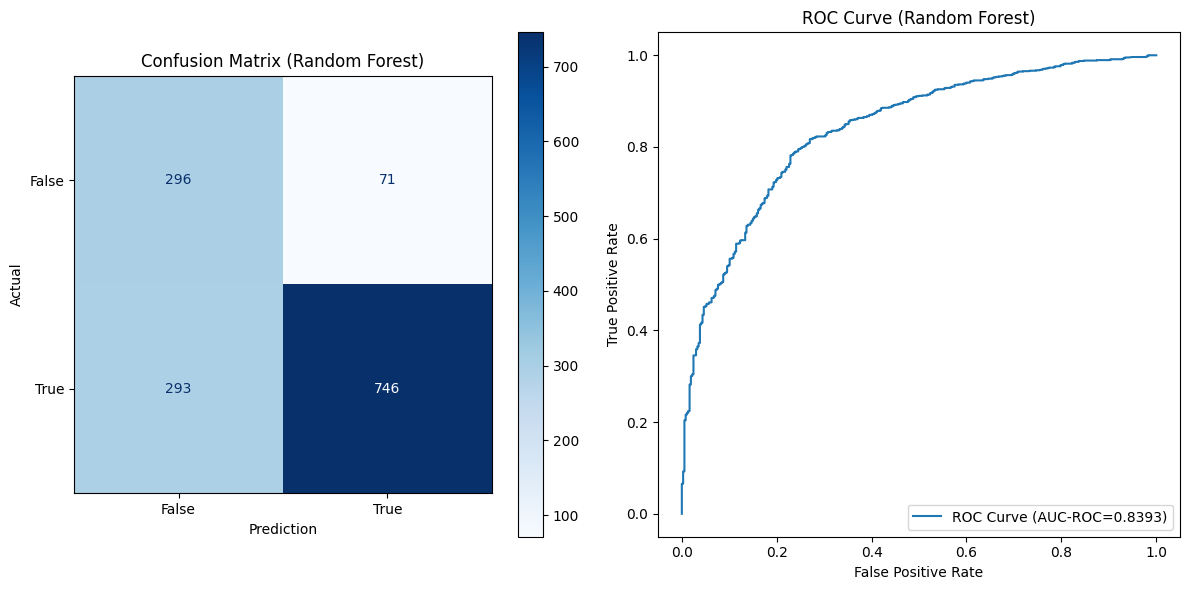

In [185]:
# Plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=m3_conf_matrix)
disp_rf.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (Random Forest)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(target_valid, m3_predictions_proba_valid)
ax2.plot(fpr_rf, tpr_rf, label='ROC Curve (AUC-ROC=%0.4f)' % m3_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (Random Forest)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;"> ▶ The <b>"downsampled"</b> dataset is the best for this Random Forest model. Although both datasets have the same AUC-ROC, the downsampled dataset offers better metrics in terms of accuracy, recall, and F1 Score. This indicates that the model is more balanced and effective. </div>

### Model 4: Grid Search + Random Forest


<div style="color: #196CC4;">
▶ Grid Search optimizes the Random Forest hyperparameters by searching for the combination that yields the best model performance and accuracy.
</div>

In [188]:
# Model
model4 = RandomForestClassifier(random_state=12345)

# Parameters
m4_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [10, 20, 30]
}

# Grid Search configuration
m4_grid_search = GridSearchCV(
    estimator=model4, param_grid=m4_param_grid, cv=5, scoring='f1')

# Train
#m4_grid_search.fit(features_upsampled, target_upsampled)
m4_grid_search.fit(features_downsampled, target_downsampled)

# Best model
m4_best_model = m4_grid_search.best_estimator_

# Predictions
m4_predictions_valid = m4_best_model.predict(features_valid)
m4_predictions_proba_valid = m4_best_model.predict_proba(features_valid)[:, 1]

# Best hyperparameters & score
print("Best hyperparameters:", m4_grid_search.best_params_)
print("Best F1:", m4_grid_search.best_score_)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 50}
Best F1: 0.744217500163485


In [189]:
# Metrics
m4_auc_roc = roc_auc_score(target_valid, m4_predictions_proba_valid)
m4_accuracy = accuracy_score(target_valid, m4_predictions_valid)
m4_precision = precision_score(target_valid, m4_predictions_valid)
m4_recall = recall_score(target_valid, m4_predictions_valid)
m4_f1 = f1_score(target_valid, m4_predictions_valid)
m4_conf_matrix = confusion_matrix(target_valid, m4_predictions_valid)

# Print
print("\n*****\nModel 4: Grid Search + Random Forest")
print(f"AUC-ROC: {m4_auc_roc:.2f}")
print(f"Accuracy: {m4_accuracy:.2f}")
print(f"Precision: {m4_precision:.2f}")
print(f"Recall: {m4_recall:.2f}")
print(f"F1 Score: {m4_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(m4_conf_matrix)


*****
Model 4: Grid Search + Random Forest
AUC-ROC: 0.84
Accuracy: 0.73
Precision: 0.92
Recall: 0.70
F1 Score: 0.79
Confusion Matrix:
[[303  64]
 [315 724]]


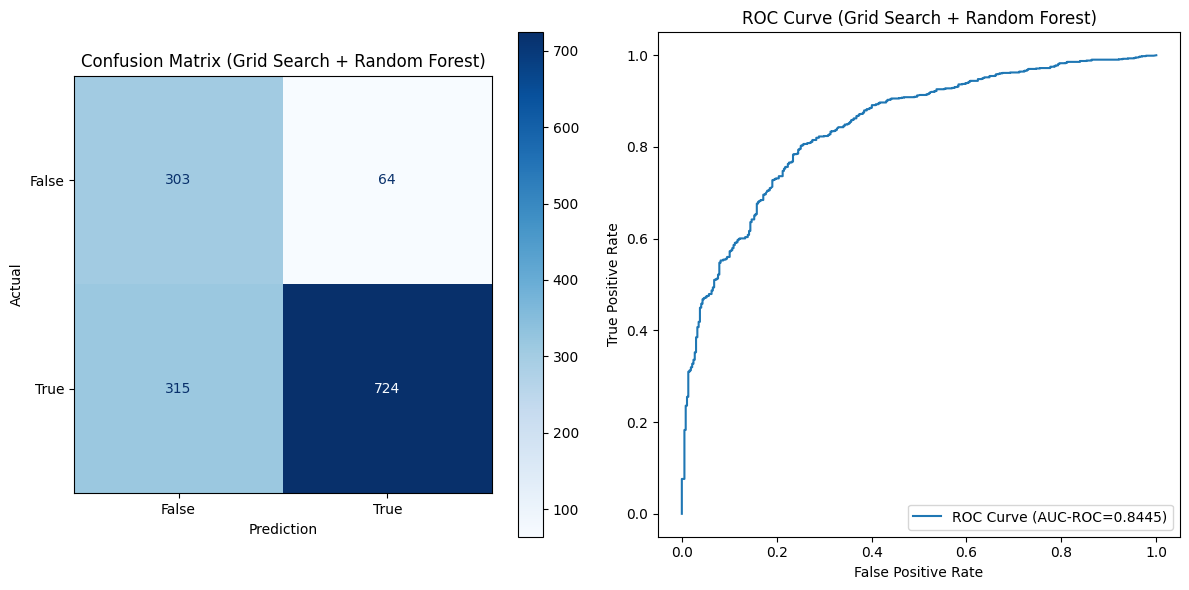

In [190]:
# Plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=m4_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (Grid Search + Random Forest)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_valid, m4_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % m4_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (Grid Search + Random Forest)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ The <b>"downsampled"</b> dataset is the best for this Grid Search + Random Forest model. It shows slightly better performance in terms of key metrics such as F1 Score and the confusion matrix.
</div>


### Model 5: Gradient Boosting Machine (GBM)

<div style="color: #196CC4;">
▶ Model that builds decision trees sequentially, where each new tree tries to correct the errors of the previous one. It is powerful and effective for finding complex patterns in the data, which could be key to accurately predicting customer churn rates.
</div>


In [192]:
# Model
model5 = GradientBoostingClassifier(random_state=12345)

# Train
#model5.fit(features_upsampled, target_upsampled)
model5.fit(features_downsampled, target_downsampled)

# Predictions
m5_predictions_valid = model5.predict(features_valid)
m5_predictions_proba_valid = model5.predict_proba(features_valid)[:, 1]

In [193]:
# Metrics
m5_auc_roc = roc_auc_score(target_valid, m5_predictions_proba_valid)
m5_accuracy = accuracy_score(target_valid, m5_predictions_valid)
m5_precision = precision_score(target_valid, m5_predictions_valid)
m5_recall = recall_score(target_valid, m5_predictions_valid)
m5_f1 = f1_score(target_valid, m5_predictions_valid)
m5_conf_matrix = confusion_matrix(target_valid, m5_predictions_valid)

# Print
print("\n*****\nModel 5: Gradient Boosting Machine (GBM)")
print(f"AUC-ROC: {m5_auc_roc:.2f}")
print(f"Accuracy: {m5_accuracy:.2f}")
print(f"Precision: {m5_precision:.2f}")
print(f"Recall: {m5_recall:.2f}")
print(f"F1 Score: {m5_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(m5_conf_matrix)


*****
Model 5: Gradient Boosting Machine (GBM)
AUC-ROC: 0.84
Accuracy: 0.74
Precision: 0.91
Recall: 0.71
F1 Score: 0.80
Confusion Matrix:
[[294  73]
 [299 740]]


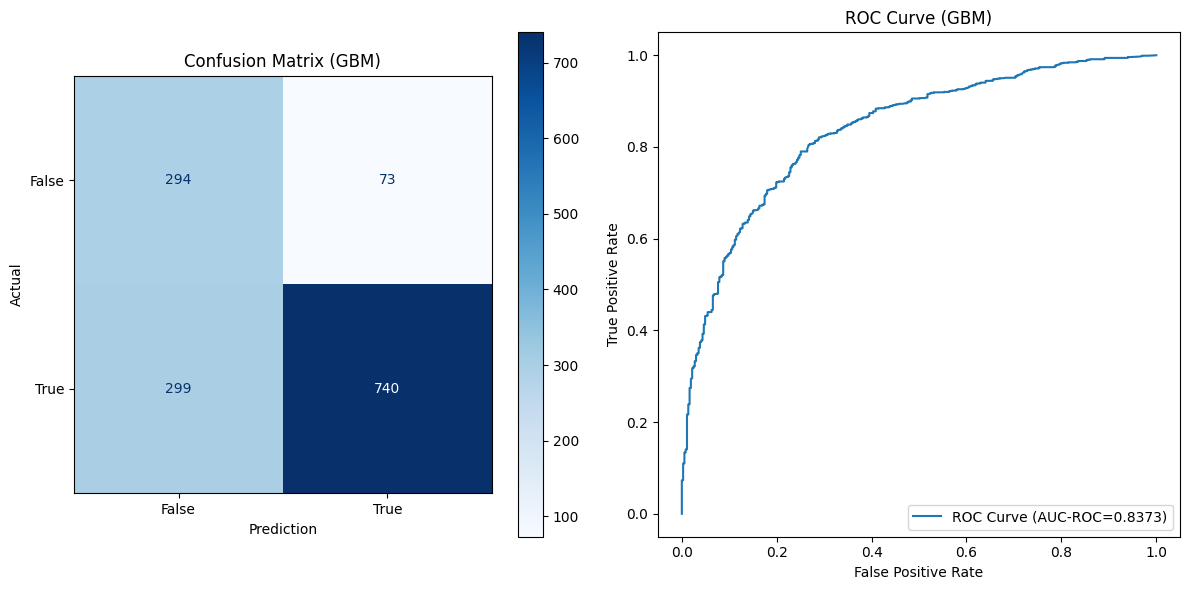

In [194]:

# General plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=m5_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (GBM)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_valid, m5_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % m5_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (GBM)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ The <b>"downsampled"</b> dataset is the best for this Gradient Boosting Machine (GBM) model. Although the upsampled dataset has a slightly better AUC-ROC (0.86 vs. 0.85), the downsampled dataset offers better metrics in terms of accuracy, recall, and F1 Score.
</div>


### Model 6: Grid Search + Gradient Boosting Machine (GBM)

<div style="color: #196CC4;">
▶ Grid Search optimizes the hyperparameters of the Gradient Boosting model by searching for the combination that maximizes performance.
</div>


In [195]:
# Model
model6 = GradientBoostingClassifier(random_state=12345)

# Parameters
m6_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [10, 20]
}

# Grid Search configuration
m6_grid_search = GridSearchCV(
    estimator=model6, param_grid=m6_param_grid, cv=5, scoring='f1')

# Train with Grid Search
#m6_grid_search.fit(features_upsampled, target_upsampled)
m6_grid_search.fit(features_downsampled, target_downsampled)

# Best model
m6_best_model = m6_grid_search.best_estimator_

# Predictions
m6_predictions_valid = m6_best_model.predict(features_valid)
m6_predictions_proba_valid = m6_best_model.predict_proba(features_valid)[:, 1]

# Best hyperparameters & score
print("Best hyperparameters:", m6_grid_search.best_params_)
print("Best F1:", m6_grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 20, 'n_estimators': 50}
Best F1: 0.7496416886605484


In [196]:
# Metrics
m6_auc_roc = roc_auc_score(target_valid, m6_predictions_proba_valid)
m6_accuracy = accuracy_score(target_valid, m6_predictions_valid)
m6_precision = precision_score(target_valid, m6_predictions_valid)
m6_recall = recall_score(target_valid, m6_predictions_valid)
m6_f1 = f1_score(target_valid, m6_predictions_valid)
m6_conf_matrix = confusion_matrix(target_valid, m6_predictions_valid)

# Print
print("\n*****\nModel 6: Grid Search + Gradient Boosting Machine")
print(f"AUC-ROC: {m6_auc_roc:.2f}")
print(f"Accuracy: {m6_accuracy:.2f}")
print(f"Precision: {m6_precision:.2f}")
print(f"Recall: {m6_recall:.2f}")
print(f"F1 Score: {m6_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(m6_conf_matrix)


*****
Model 6: Grid Search + Gradient Boosting Machine
AUC-ROC: 0.84
Accuracy: 0.74
Precision: 0.92
Recall: 0.71
F1 Score: 0.80
Confusion Matrix:
[[302  65]
 [304 735]]


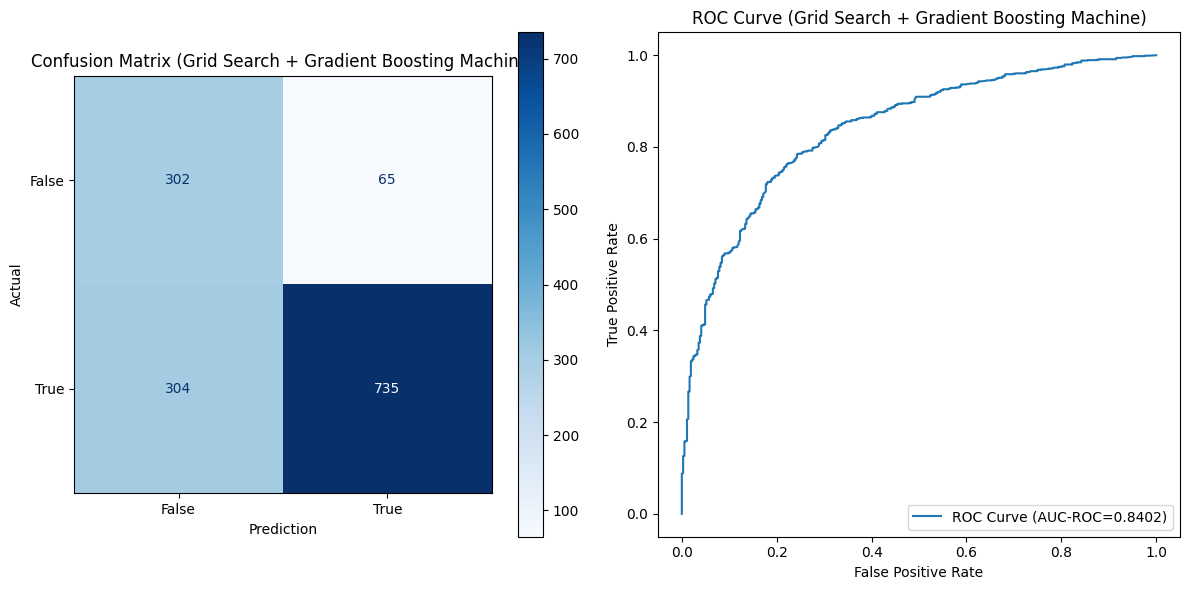

In [197]:
# General plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=m6_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (Grid Search + Gradient Boosting Machine)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_valid, m6_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % m6_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (Grid Search + Gradient Boosting Machine)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ The <b>"downsampled"</b> dataset is the best for this Grid Search + Gradient Boosting Machine model. It shows slightly superior metrics in terms of AUC-ROC, accuracy, and F1 Score.
</div>


### Model 7: XGBoost (Extreme Gradient Boosting)

<div style="color: #196CC4;">
▶ An improved version of Gradient Boosting that makes the model faster and more accurate. It is extremely effective for problems such as predicting customer churn.
</div>


In [198]:
# Set the logging level to ERROR to suppress warnings ("use_label_encoder")
xgb.set_config(verbosity=2)
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

In [199]:
# Convert Arrays of NumPy
features_downsampled_np = features_downsampled.values
target_downsampled_np = target_downsampled.values
features_upsampled_np = features_upsampled.values
target_upsampled_np = target_upsampled.values
features_valid_np = features_valid.values

# Model
model7 = xgb.XGBClassifier(random_state=12345)

# Train
model7.fit(features_downsampled_np, target_downsampled_np)
#model7.fit(features_upsampled_np, target_upsampled_np)

# Predictions
m7_predictions_valid = model7.predict(features_valid_np)
m7_predictions_proba_valid = model7.predict_proba(features_valid_np)[:, 1]

In [200]:

# Metrics
m7_auc_roc = roc_auc_score(target_valid, m7_predictions_proba_valid)
m7_accuracy = accuracy_score(target_valid, m7_predictions_valid)
m7_precision = precision_score(target_valid, m7_predictions_valid)
m7_recall = recall_score(target_valid, m7_predictions_valid)
m7_f1 = f1_score(target_valid, m7_predictions_valid)
m7_conf_matrix = confusion_matrix(target_valid, m7_predictions_valid)

# Print
print("\n*****\nModel 7: XGBoost (Extreme Gradient Boosting)")
print(f"AUC-ROC: {m7_auc_roc:.2f}")
print(f"Accuracy: {m7_accuracy:.2f}")
print(f"Precision: {m7_precision:.2f}")
print(f"Recall: {m7_recall:.2f}")
print(f"F1 Score: {m7_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(m7_conf_matrix)


*****
Model 7: XGBoost (Extreme Gradient Boosting)
AUC-ROC: 0.80
Accuracy: 0.71
Precision: 0.89
Recall: 0.70
F1 Score: 0.78
Confusion Matrix:
[[275  92]
 [316 723]]


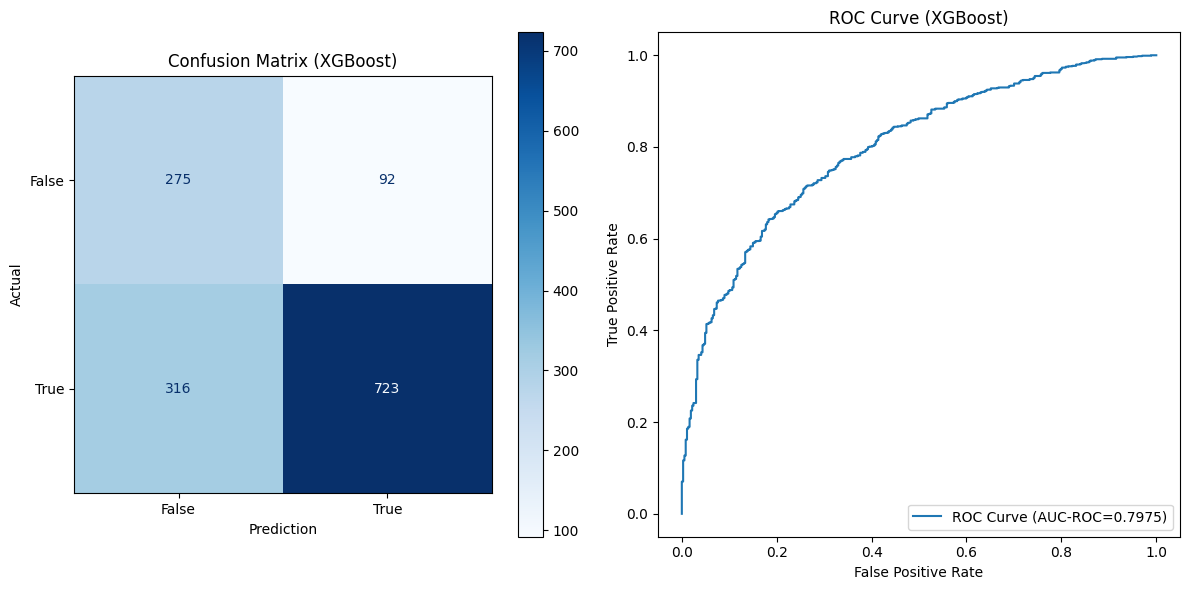

In [201]:
# General plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=m7_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (XGBoost)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_valid, m7_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % m7_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (XGBoost)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ The <b>"downsampled"</b> dataset is the best for this XGBoost model. Although the upsampled dataset shows a slightly better AUC-ROC (0.83 vs. 0.82) and slightly higher precision, the downsampled dataset offers better accuracy, recall, F1 Score, and a higher number of true positives.
</div>


### Model 8: Grid Search + XGBoost (Extreme Gradient Boosting)

<div style="color: #196CC4;">
▶ Grid Search adjusts the hyperparameters of the XGBoost model to find the configuration that provides the best possible performance.
</div>


In [202]:
# Model
model8 = XGBClassifier(
    random_state=12345, use_label_encoder=False, eval_metric='logloss')

# Parameters
m8_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# Grid Search configuration
m8_grid_search = GridSearchCV(
    estimator=model8, param_grid=m8_param_grid, cv=5, scoring='f1')

# Train GridSearchCV
m8_grid_search.fit(features_downsampled_np, target_downsampled_np)
#m8_grid_search.fit(features_upsampled_np, target_upsampled_np)

# Best model
m8_best_model = m8_grid_search.best_estimator_

# Predictions
m8_predictions_valid = m8_best_model.predict(features_valid_np)
m8_predictions_proba_valid = m8_best_model.predict_proba(features_valid_np)[
    :, 1]

# Best hyperparameters & score
print("Best hyperparameters:", m8_grid_search.best_params_)
print("Best F1:", m8_grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50}
Best F1: 0.7518394976848767


In [203]:
# Metrics
m8_auc_roc = roc_auc_score(target_valid, m8_predictions_proba_valid)
m8_accuracy = accuracy_score(target_valid, m8_predictions_valid)
m8_precision = precision_score(target_valid, m8_predictions_valid)
m8_recall = recall_score(target_valid, m8_predictions_valid)
m8_f1 = f1_score(target_valid, m8_predictions_valid)
m8_conf_matrix = confusion_matrix(target_valid, m8_predictions_valid)

# Print
print("\n*****\nModel 8: Grid Search + Extreme Gradient Boosting (XGBoost)")
print(f"AUC-ROC: {m8_auc_roc:.2f}")
print(f"Accuracy: {m8_accuracy:.2f}")
print(f"Precision: {m8_precision:.2f}")
print(f"Recall: {m8_recall:.2f}")
print(f"F1 Score: {m8_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix")
print(m8_conf_matrix)


*****
Model 8: Grid Search + Extreme Gradient Boosting (XGBoost)
AUC-ROC: 0.84
Accuracy: 0.73
Precision: 0.92
Recall: 0.69
F1 Score: 0.79
Confusion Matrix
[[306  61]
 [320 719]]


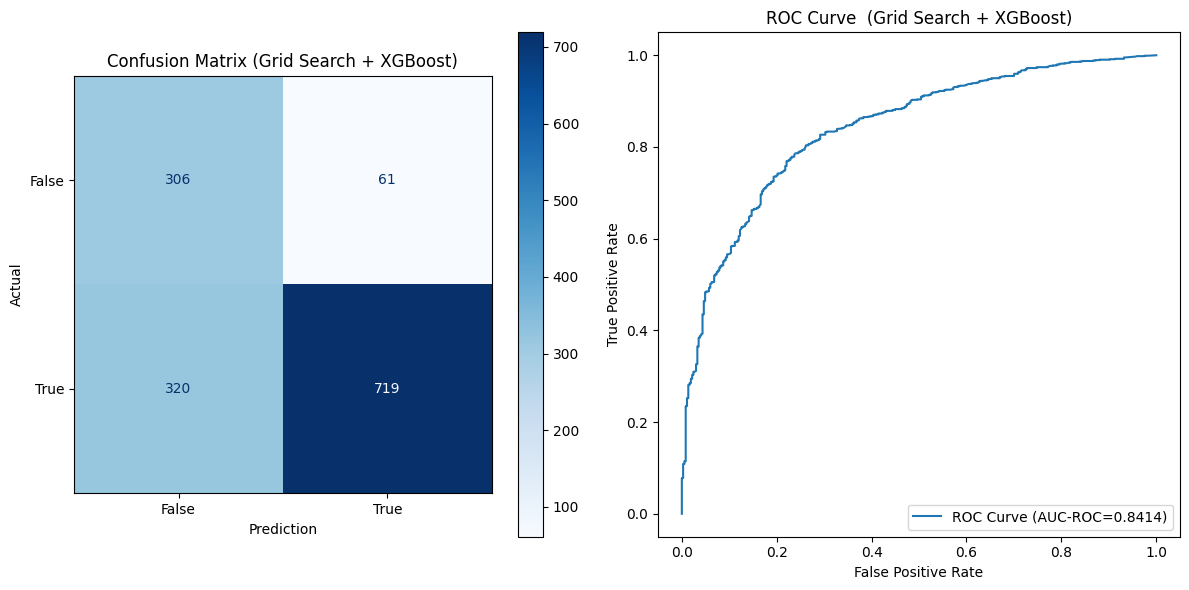

In [204]:
# General plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=m8_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (Grid Search + XGBoost)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_valid, m8_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % m8_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve  (Grid Search + XGBoost)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ The <b>"downsampled"</b> dataset is the best for this Grid Search + XGBoost model. It offers better performance in terms of Accuracy, Recall, and F1 Score, which is crucial for a proper balance between correctly identifying positive instances.
</div>


### Model 9: LightGBM

<div style="color: #196CC4;">
▶ LightGBM is a variant of Gradient Boosting optimized for speed and memory efficiency, capable of handling large volumes of data. Its efficiency and precision make it ideal for large datasets.
</div>


In [205]:
# Model
model9 = lgb.LGBMClassifier(random_state=12345)

# Train
#model9.fit(features_upsampled, target_upsampled)
model9.fit(features_downsampled, target_downsampled)

# Predictions
m9_predictions_valid = model9.predict(features_valid)
m9_predictions_proba_valid = model9.predict_proba(features_valid)[:, 1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1113, number of negative: 1113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 2226, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [206]:

# Metrics
m9_auc_roc = roc_auc_score(target_valid, m9_predictions_proba_valid)
m9_accuracy = accuracy_score(target_valid, m9_predictions_valid)
m9_precision = precision_score(target_valid, m9_predictions_valid)
m9_recall = recall_score(target_valid, m9_predictions_valid)
m9_f1 = f1_score(target_valid, m9_predictions_valid)
m9_conf_matrix = confusion_matrix(target_valid, m9_predictions_valid)

# Print
print("\n*****\nModel 9: LightGBM (Light Gradient Boosting Machine)")
print(f"AUC-ROC: {m9_auc_roc:.2f}")
print(f"Accuracy: {m9_accuracy:.2f}")
print(f"Precision: {m9_precision:.2f}")
print(f"Recall: {m9_recall:.2f}")
print(f"F1 Score: {m9_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(m9_conf_matrix)


*****
Model 9: LightGBM (Light Gradient Boosting Machine)
AUC-ROC: 0.82
Accuracy: 0.72
Precision: 0.90
Recall: 0.70
F1 Score: 0.79
Confusion Matrix:
[[290  77]
 [312 727]]


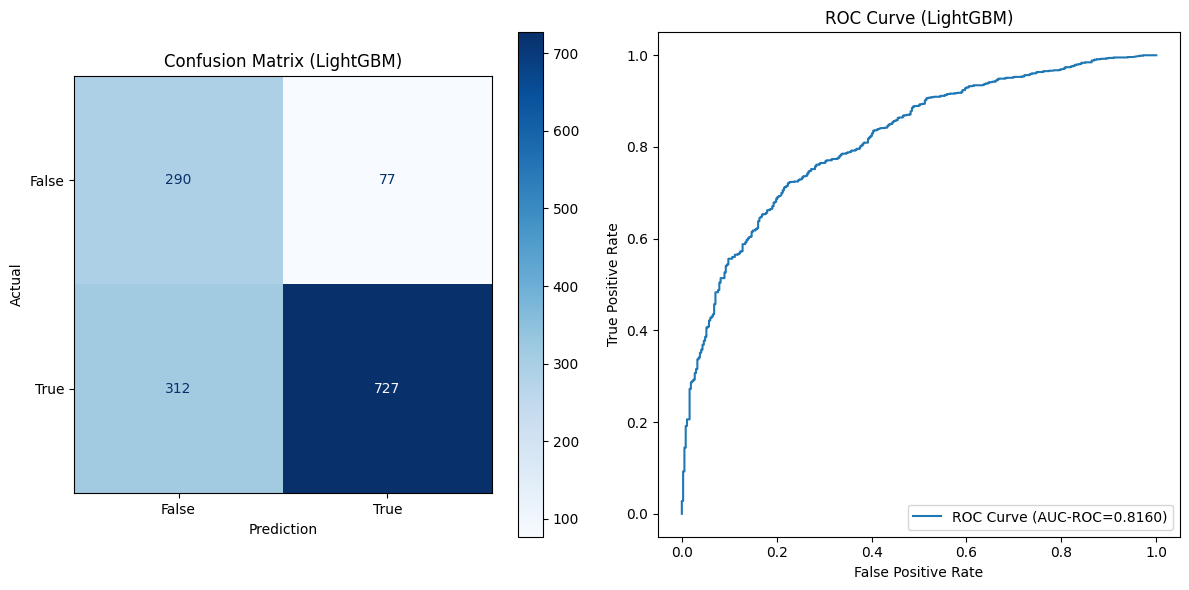

In [207]:

# General plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=m9_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (LightGBM)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_valid, m9_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % m9_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (LightGBM)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ The <b>"downsampled"</b> dataset is the best for this LightGBM model. Although both datasets have identical AUC-ROC, the downsampled dataset offers better results in terms of overall accuracy, recall, and F1 Score. Additionally, it provides a better balance between true positives and false negatives.
</div>


### Model 10: Grid Search + LightGBM

<div style="color: #196CC4;">
▶ Optimizing LightGBM with Grid Search can lead the model to reach its maximum potential, increasing accuracy and maximizing AUC-ROC.
</div>


In [208]:
# Model
model10 = lgb.LGBMClassifier(random_state=12345)

# Parameters
m10_param_grid = {
    'num_leaves': [20, 31],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 15]
}

# Grid Search configuration
m10_grid_search = GridSearchCV(
    estimator=model10, param_grid=m10_param_grid, cv=5, scoring='f1')

# Train
#m10_grid_search.fit(features_upsampled, target_upsampled)
m10_grid_search.fit(features_downsampled, target_downsampled)

# Best model
m10_best_model = m10_grid_search.best_estimator_

# Predictions
m10_predictions_valid = m10_best_model.predict(features_valid)
m10_predictions_proba_valid = m10_best_model.predict_proba(features_valid)[:, 1]

# Best hyperparameters
print(f"Best hyperparameters: {m10_grid_search.best_params_}")
print(f"Best F1: {m10_grid_search.best_score_:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 890, number of negative: 890
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 1780, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 890, number of negative: 891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 1781, number of used fe

In [209]:
# Metrics
m10_auc_roc = roc_auc_score(target_valid, m10_predictions_proba_valid)
m10_accuracy = accuracy_score(target_valid, m10_predictions_valid)
m10_precision = precision_score(target_valid, m10_predictions_valid)
m10_recall = recall_score(target_valid, m10_predictions_valid)
m10_f1 = f1_score(target_valid, m10_predictions_valid)
m10_conf_matrix = confusion_matrix(target_valid, m10_predictions_valid)

# Print
print("\n*****\nModel 10: Grid Search + LightGBM")
print(f"AUC-ROC: {m10_auc_roc:.2f}")
print(f"Accuracy: {m10_accuracy:.2f}")
print(f"Precision: {m10_precision:.2f}")
print(f"Recall: {m10_recall:.2f}")
print(f"F1 Score: {m10_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(m10_conf_matrix)


*****
Model 10: Grid Search + LightGBM
AUC-ROC: 0.83
Accuracy: 0.73
Precision: 0.91
Recall: 0.71
F1 Score: 0.80
Confusion Matrix:
[[294  73]
 [300 739]]


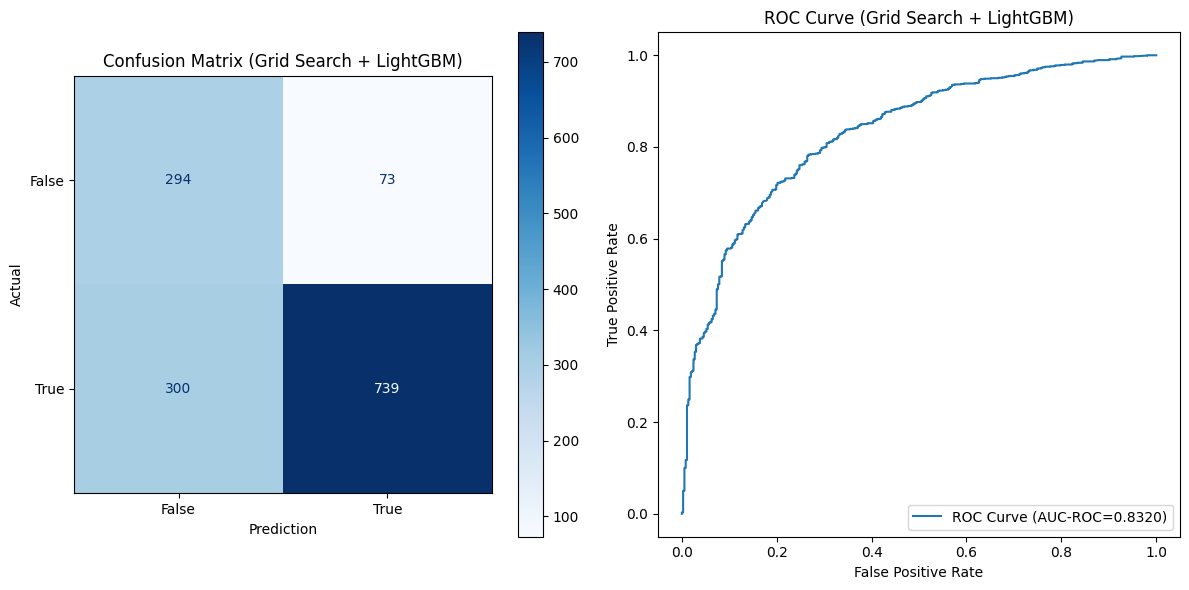

In [210]:
# Plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=m10_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix (Grid Search + LightGBM)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_valid, m10_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % m10_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (Grid Search + LightGBM)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ The <b>"downsampled"</b> dataset is the best for this Grid Search + LightGBM model. Although both datasets produce similar results, the model with the downsampled dataset has a better balance in terms of recall and F1 Score.
</div>


-----

## Model Evaluation

### Results Summary

<div style="color: #196CC4;">
▶ To present the results in a more structured and clear manner, the following table will allow easy comparison of the metrics across different models. Additionally, confusion matrices for all models will be displayed visually, and finally, a graph with all the ROC curves of the previously evaluated models will be shown.
</div>


In [212]:
# Dictionary
resultados = {
    'Model': [
        'Logistic Regression', 'K-Nearest Neighbors', 'Random Forest',
        'Grid Search + Random Forest', 'Gradient Boosting Machine',
        'Grid Search + GBM', 'XGBoost',
        'Grid Search + XGBoost', 'LightGBM', 'Grid Search + LightGBM'
    ],
    'AUC-ROC': [
        m1_auc_roc, m2_auc_roc, m3_auc_roc,
        m4_auc_roc, m5_auc_roc, m6_auc_roc,
        m7_auc_roc, m8_auc_roc, m9_auc_roc,
        m10_auc_roc
    ],
    'Accuracy': [
        m1_accuracy, m2_accuracy, m3_accuracy,
        m4_accuracy, m5_accuracy, m6_accuracy,
        m7_accuracy, m8_accuracy, m9_accuracy,
        m10_accuracy
    ],
    'Precision': [
        m1_precision, m2_precision, m3_precision,
        m4_precision, m5_precision, m6_precision,
        m7_precision, m8_precision, m9_precision,
        m10_precision
    ],
    'Recall': [
        m1_recall, m2_recall, m3_recall,
        m4_recall, m5_recall, m6_recall,
        m7_recall, m8_recall, m9_recall,
        m10_recall
    ],
    'F1 Score': [
        m1_f1, m2_f1, m3_f1,
        m4_f1, m5_f1, m6_f1,
        m7_f1, m8_f1, m9_f1,
        m10_f1
    ],
    'Confusion Matrix': [
        m1_conf_matrix, m2_conf_matrix, m3_conf_matrix,
        m4_conf_matrix, m5_conf_matrix, m6_conf_matrix,
        m7_conf_matrix, m8_conf_matrix, m9_conf_matrix,
        m10_conf_matrix
    ]
}

# DataFrame
df_resultados = pd.DataFrame(resultados)

# Print
print("\n*****\nSummary of results for each model:")
display(df_resultados)


*****
Summary of results for each model:


,Model,AUC-ROC,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.831666,0.736131,0.901442,0.721848,0.801710,"[[285, 82], [289, 750]]"
1,K-Nearest Neighbors,0.792257,0.706259,0.906494,0.671800,0.771697,"[[295, 72], [341, 698]]"
2,Random Forest,0.839343,0.741110,0.913097,0.717998,0.803879,"[[296, 71], [293, 746]]"
3,Grid Search + Random Forest,0.844507,0.730441,0.918782,0.696824,0.792556,"[[303, 64], [315, 724]]"
4,Gradient Boosting Machine,0.837294,0.735420,0.910209,0.712223,0.799136,"[[294, 73], [299, 740]]"
5,Grid Search + GBM,0.840223,0.737553,0.918750,0.707411,0.799347,"[[302, 65], [304, 735]]"
6,XGBoost,0.797509,0.709815,0.887117,0.695861,0.779935,"[[275, 92], [316, 723]]"
7,Grid Search + XGBoost,0.841352,0.729018,0.921795,0.692012,0.790544,"[[306, 61], [320, 719]]"
8,LightGBM,0.815981,0.723329,0.904229,0.699711,0.788931,"[[290, 77], [312, 727]]"
9,Grid Search + LightGBM,0.832004,0.734708,0.910099,0.711261,0.798487,"[[294, 73], [300, 739]]"


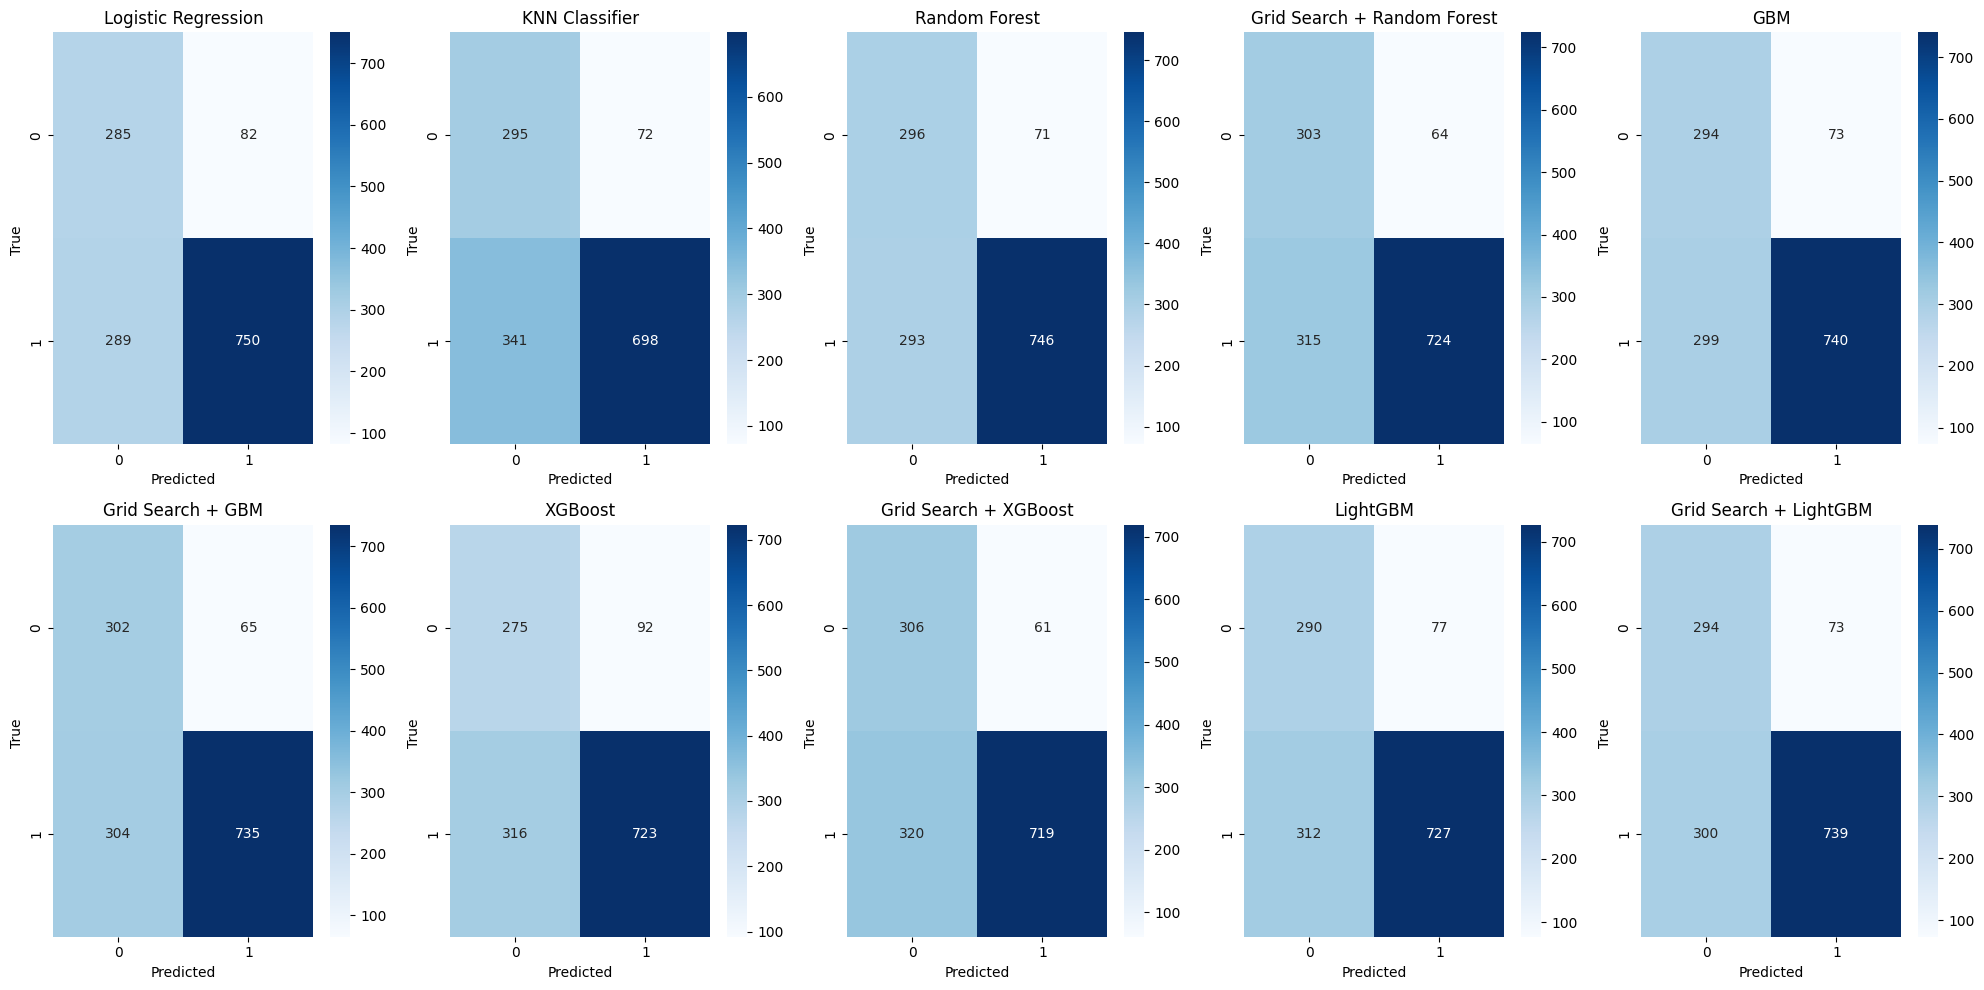

In [213]:
# list of Confusion Matrices
matrices = [m1_conf_matrix, m2_conf_matrix, m3_conf_matrix, m4_conf_matrix,
            m5_conf_matrix, m6_conf_matrix, m7_conf_matrix, m8_conf_matrix,
            m9_conf_matrix, m10_conf_matrix]
modelos = ['Logistic Regression', 'KNN Classifier', 'Random Forest',
           'Grid Search + Random Forest', 'GBM', 'Grid Search + GBM',
           'XGBoost', 'Grid Search + XGBoost', 'LightGBM', 'Grid Search + LightGBM']

# Subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, (matrix, model) in enumerate(zip(matrices, modelos)):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True ')

# Print
plt.tight_layout()
plt.show()

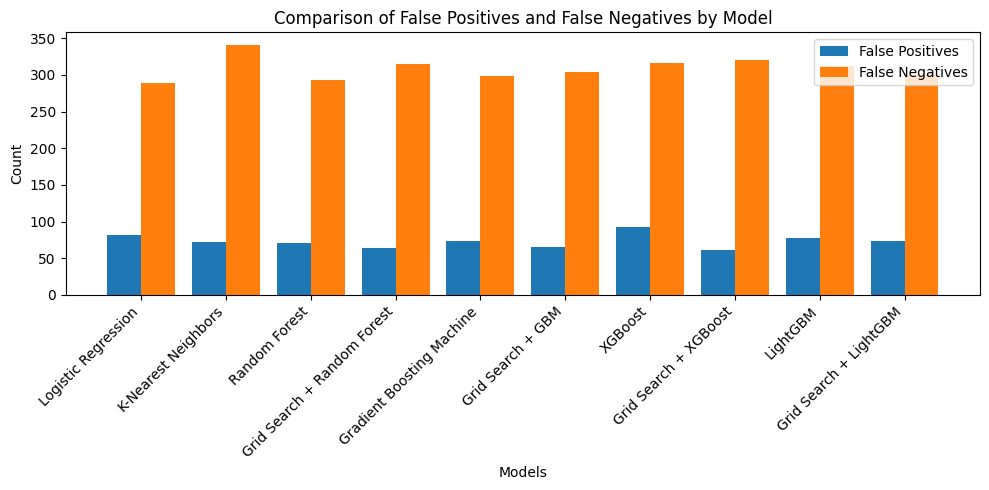

In [218]:
# inicialization
falsos_positivos = []
falsos_negativos = []

# Loop
for matriz_confusion in df_resultados['Confusion Matrix']:
    fp = matriz_confusion[0, 1]
    fn = matriz_confusion[1, 0]
    falsos_positivos.append(fp)
    falsos_negativos.append(fn)

# Bar plot
fig, ax = plt.subplots(figsize=(10, 5))
modelo_labels = df_resultados['Model']
x = range(len(modelo_labels))
width = 0.4

# Bars
bar1 = ax.bar(x, falsos_positivos, width, label='False Positives')
bar2 = ax.bar([i + width for i in x], falsos_negativos,
              width, label='False Negatives')

# Title and labels
ax.set_xlabel('Models')
ax.set_ylabel('Count')
ax.set_title('Comparison of False Positives and False Negatives by Model')

ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(modelo_labels, rotation=45, ha='right')
ax.legend()

# Print
plt.tight_layout()
plt.show()

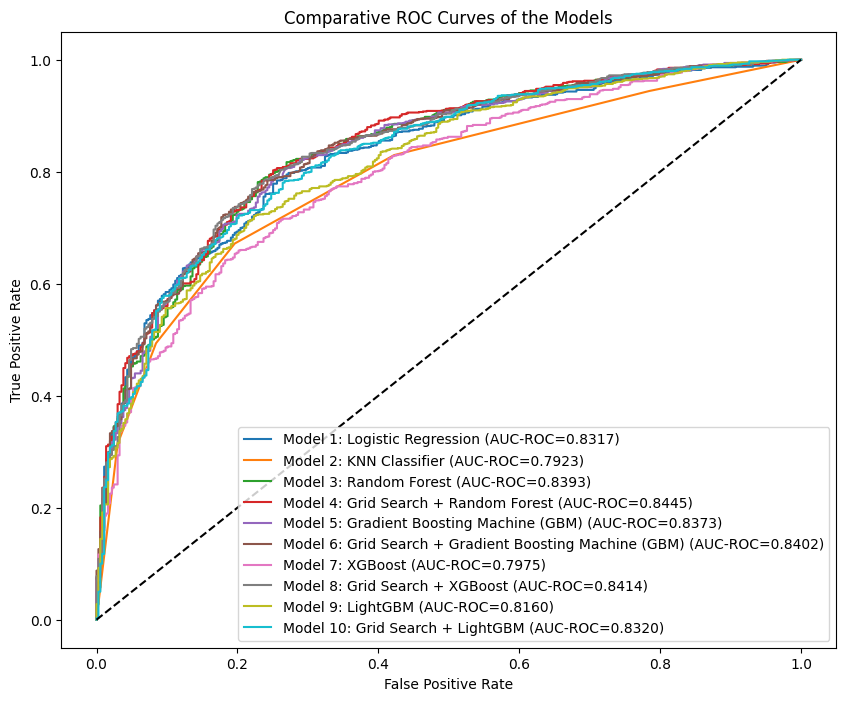

In [219]:
# List of models
models = [
    ("Model 1: Logistic Regression", m1_auc_roc, m1_predictions_proba_valid),
    ("Model 2: KNN Classifier", m2_auc_roc, m2_predictions_proba_valid),
    ("Model 3: Random Forest", m3_auc_roc, m3_predictions_proba_valid),
    ("Model 4: Grid Search + Random Forest", m4_auc_roc, m4_predictions_proba_valid),
    ("Model 5: Gradient Boosting Machine (GBM)", m5_auc_roc, m5_predictions_proba_valid),
    ("Model 6: Grid Search + Gradient Boosting Machine (GBM)", m6_auc_roc, m6_predictions_proba_valid),
    ("Model 7: XGBoost", m7_auc_roc, m7_predictions_proba_valid),
    ("Model 8: Grid Search + XGBoost", m8_auc_roc, m8_predictions_proba_valid),
    ("Model 9: LightGBM", m9_auc_roc, m9_predictions_proba_valid),
    ("Model 10: Grid Search + LightGBM", m10_auc_roc, m10_predictions_proba_valid),
]

# Plot
plt.figure(figsize=(10, 8))

# ROC Curves
for model_name, auc_roc, predictions_proba in models:
    fpr, tpr, _ = roc_curve(target_valid, predictions_proba)
    plt.plot(fpr, tpr, label='%s (AUC-ROC=%0.4f)' % (model_name, auc_roc))

# Graphs
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curves of the Models')
plt.legend(loc='lower right')

# Print
plt.show()

### Results Analysis

<div style="color: #196CC4;">
▶ <b>AUC-ROC:</b> The Grid Search + Random Forest, Grid Search + Gradient Boosting Machine, and Grid Search + Extreme Gradient Boosting (XGBoost) models exceed the 0.83 threshold in AUC-ROC; they show solid performance.<br>
▶ <b>Accuracy:</b> The Logistic Regression, Random Forest, Gradient Boosting Machine, Grid Search + Extreme Gradient Boosting (XGBoost), and Grid Search + LightGBM models achieve an accuracy above 0.73, indicating a high rate of correct classification.<br>
▶ <b>Precision and Recall:</b> Most models have high precision in positive predictions, although recall could be improved in some models.<br>
▶ <b>F1 Score:</b> The Logistic Regression and Random Forest models have the best results in F1 Score, showing a good balance between precision and recall.<br>
▶ <b>Confusion Matrices:</b> The standard Random Forest and Gradient Boosting Machine models are the most balanced in terms of true positives and negatives. However, there is a trend in the models to have more false negatives than false positives, indicating a tendency to underestimate customer churn.
</div>


### Model Selection with Best Performance

<div style="color: #196CC4;">
▶ <b>The Random Forest Model is the best choice for this project</b>, considering all metrics and the stability of the results. It offers a high AUC-ROC, precision, recall, and F1 score, along with a balanced confusion matrix, tends to be fast in training, and demonstrates overall good performance compared to the other evaluated models.<br>
▶ Below is the Random Forest model with the best hyperparameters selected from the Grid Search used.
</div>

In [220]:
# Model with the Best Hyperparameters
modelf = RandomForestClassifier(
    random_state=12345,
    max_depth=20,
    min_samples_leaf=10,
    n_estimators=50
)

# Downsampling
final_features_downsampled, final_target_downsampled = downsample(
    total_features_train, total_target_train)

# Training
modelf.fit(final_features_downsampled, final_target_downsampled)

# Predictions
mf_predictions_valid = modelf.predict(features_test)
mf_predictions_proba_valid = modelf.predict_proba(features_test)[:, 1]

In [221]:
# Metrics
mf_auc_roc = roc_auc_score(target_test, mf_predictions_proba_valid)
mf_accuracy = accuracy_score(target_test, mf_predictions_valid)
mf_precision = precision_score(target_test, mf_predictions_valid)
mf_recall = recall_score(target_test, mf_predictions_valid)
mf_f1 = f1_score(target_test, mf_predictions_valid)
mf_conf_matrix = confusion_matrix(target_test, mf_predictions_valid)

# Print
print("\n*****\nFinal model: Random Forest")
print(f"AUC-ROC: {mf_auc_roc:.2f}")
print(f"Accuracy: {mf_accuracy:.2f}")
print(f"Precision: {mf_precision:.2f}")
print(f"Recall: {mf_recall:.2f}")
print(f"F1 Score: {mf_f1:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(mf_conf_matrix)


*****
Final model: Random Forest
AUC-ROC: 0.86
Accuracy: 0.76
Precision: 0.91
Recall: 0.74
F1 Score: 0.81
Confusion Matrix:
[[313  76]
 [267 751]]


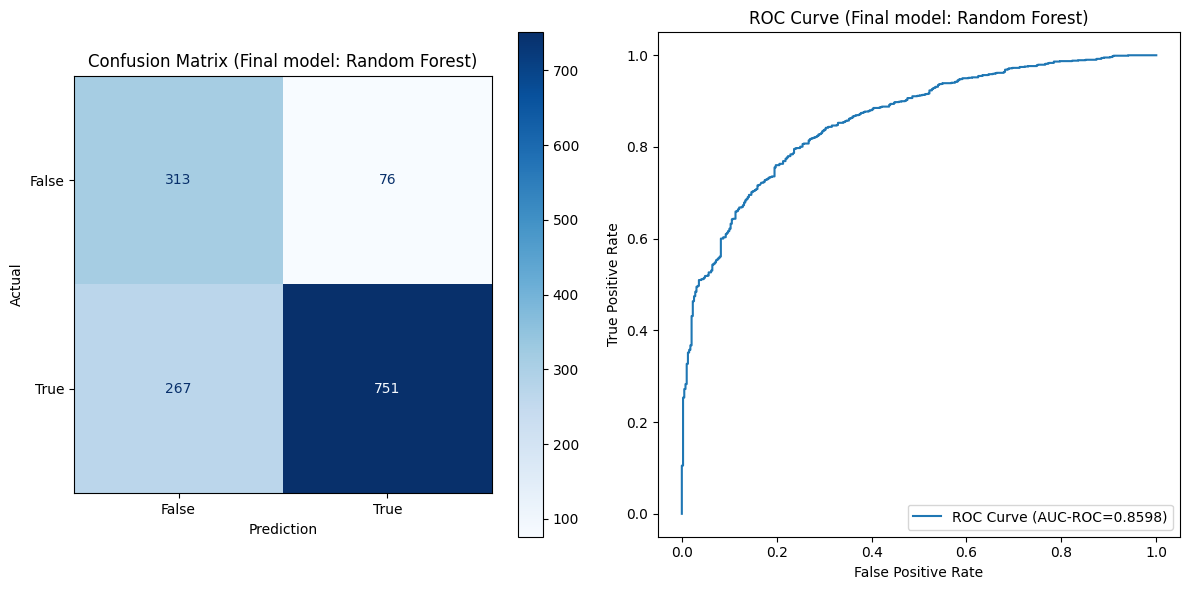

In [223]:
# Plot definition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=mf_conf_matrix)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title(
    "Confusion Matrix (Final model: Random Forest)")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
tick_labels = ['False', 'True']
ax1.set_xticks(ticks=[0, 1], labels=tick_labels)
ax1.set_yticks(ticks=[0, 1], labels=tick_labels)

# ROC Curve
fpr, tpr, _ = roc_curve(target_test, mf_predictions_proba_valid)
ax2.plot(fpr, tpr, label='ROC Curve (AUC-ROC=%0.4f)' % mf_auc_roc)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve (Final model: Random Forest)')
ax2.legend(loc='lower right')

# Print
plt.tight_layout()
plt.show()

### Analysis of the Best Performing Model


<div style="color: #196CC4;">
In the original dataset, there is an imbalance, with more instances of customers who did not churn (negative class) compared to those who did (positive class). The results for the **Random Forest** model on the test set are analyzed below:

<br>
▶ <b>AUC-ROC:</b> The value of 0.86 indicates that the model performs well in terms of discriminating between positive and negative classes. This suggests that the model is effective at distinguishing between customers who will churn and those who will not.

<br>
▶ <b>Accuracy:</b> With 76%, the model correctly classifies a high proportion of cases, which is positive. However, in class imbalance problems like this, it is crucial to also evaluate other metrics such as precision, recall, and F1 Score to get a complete view of the model's performance.

<br>
▶ <b>Precision:</b> The precision of 0.91 means that of all the positive predictions made by the model, 91% were correct. This indicates that when the model predicts a customer will churn, there is a high probability that they will indeed do so.

<br>
▶ <b>Recall:</b> With a recall of 0.74, the model is effective at identifying customers who have a high likelihood of churning. However, this recall value also suggests that the model still misses some churn cases.

<br>
▶ <b>F1 Score:</b> The F1 Score of 0.81, a combined measure of precision and recall, shows a good balance between the two metrics. This is particularly important in class imbalance problems, such as customer churn prediction.

<br>
▶ <b>Confusion Matrix:</b>

<ul>
    <li>True Positives = 751: customers who the model correctly predicted would churn and did churn.</li>
    <li>True Negatives = 313: customers who the model correctly predicted would not churn and did not churn.</li>
    <li>False Positives = 76: customers who the model incorrectly predicted would churn, but did not churn.</li>
    <li>False Negatives = 267: customers who the model incorrectly predicted would not churn, but did churn.</li>
    <li>The model is effective at capturing most of the cases of customers who actually churn. However, those false predictions may lead to unnecessary retention actions or, conversely, to missing opportunities to retain customers who actually want to churn.</li>
</ul>
<br>
</div>


-----

## Project Report and Conclusions

### Summary

<div style="color: #196CC4;">
▶ This project involved predicting customer churn for Interconnect using machine learning techniques. Four main datasets were explored: contract.csv, personal.csv, internet.csv, and phone.csv, which were integrated into a single DataFrame to facilitate analysis, cleaning, and modeling.<br>
▶ By applying various classification models such as Logistic Regression, KNN Classifier, Random Forest, XGBoost, and LightGBM (including a variation with Grid Search for some of them), a final model was selected based on Random Forest due to its robustness and performance in key metrics like AUC-ROC, Precision, Recall, and F1 Score.
</div>

### Conclusions

<div style="color: #196CC4;">
▶ The Random Forest model provides solid and balanced performance in predicting customer churn, excelling in precision and its ability to correctly discriminate between classes. Despite the presence of some false positives and negatives, the application of this model could significantly contribute to improving customer retention strategies.
</div>

### Areas for Future Improvement

<div style="color: #196CC4;">
▶ The number of false positives (76) is relatively low compared to the number of true positives, which is positive, but they could still represent additional costs if unnecessary retention measures are taken.<br>
▶ The number of false negatives (267) is significant and represents cases where the model did not correctly identify customers who did leave. This type of error is critical because it represents missed opportunities to intervene and retain customers who have a high probability of leaving the company.<br>
▶ The Random Forest model has proven effective in predicting customer churn, with a robust F1 score and good precision. However, recall could be improved to identify more cases of customers who actually leave.<br>

<b>This model can be confidently implemented to support customer retention strategies. However, it is recommended to continuously monitor its performance and consider additional adjustments to minimize both false positives and false negatives and optimize the balance between precision and recall.</b>
</div>